### Time Series Forecasting Project Jupyter File

### Submitted by: Deepti Agrawal

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines.

<div class="alert alert-block alert-info">

# Rose Wine Dataset

As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas import datetime
from warnings import filterwarnings
filterwarnings("ignore")

<ipython-input-1-17a70c9a5278>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
## Checking the current working directory
import os
os.getcwd()

'C:\\Users\\deept'

In [3]:
##Changing the Working directory
os.chdir("D:\GL\TSF")

### Q 1 Read the data as an appropriate Time Series data and plot the data.

In [4]:
df = pd.read_csv('Rose.csv')
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [5]:
df.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


In [6]:
## Checking the number of observations
df.shape

(187, 2)

#### Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [7]:
## Here we make an assumption that the date starts and ends as mentioned below
## We divide 187/12 = 15 years and convert the decimal part to 6 months
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [8]:
# Creating a new column as Time_Stamp.Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [9]:
df.set_index('Time_Stamp',inplace=True)
df.head()

,YearMonth,Rose
Time_Stamp,,
1980-01-31,1980-01,112.0
1980-02-29,1980-02,118.0
1980-03-31,1980-03,129.0
1980-04-30,1980-04,99.0
1980-05-31,1980-05,116.0


In [10]:
df.drop(labels=['YearMonth'],axis=1,inplace=True)
df.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


#### Plot the Time Series to understand the behaviour of the data.

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

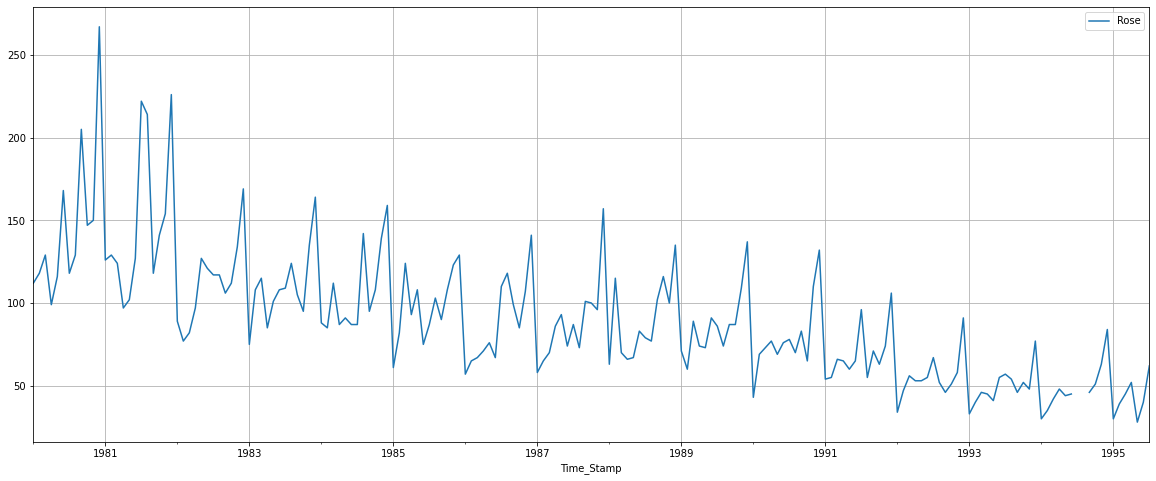

In [12]:
df.plot()
plt.grid();

### Q 2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

#### Checking the basic measures of descriptive statistics

In [13]:
df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


The basic measures of descriptive statistics tell us how the Rose Wine Sales have varied across years. But for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

In [14]:
## Checking for missing value
df.isnull().sum()

Rose    2
dtype: int64

In [15]:
rows_with_nan = []
for index, row in df.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

print(rows_with_nan)

[Timestamp('1994-07-31 00:00:00'), Timestamp('1994-08-31 00:00:00')]


In [16]:
Rose_df = df.interpolate(method='linear')

In [17]:
Rose_df.isnull().sum()

Rose    0
dtype: int64

In [18]:
Rose_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


#### Plotting a boxplot to understand the spread of Rose wine sales across different years and within different months across years.

#### Yearly Boxplot

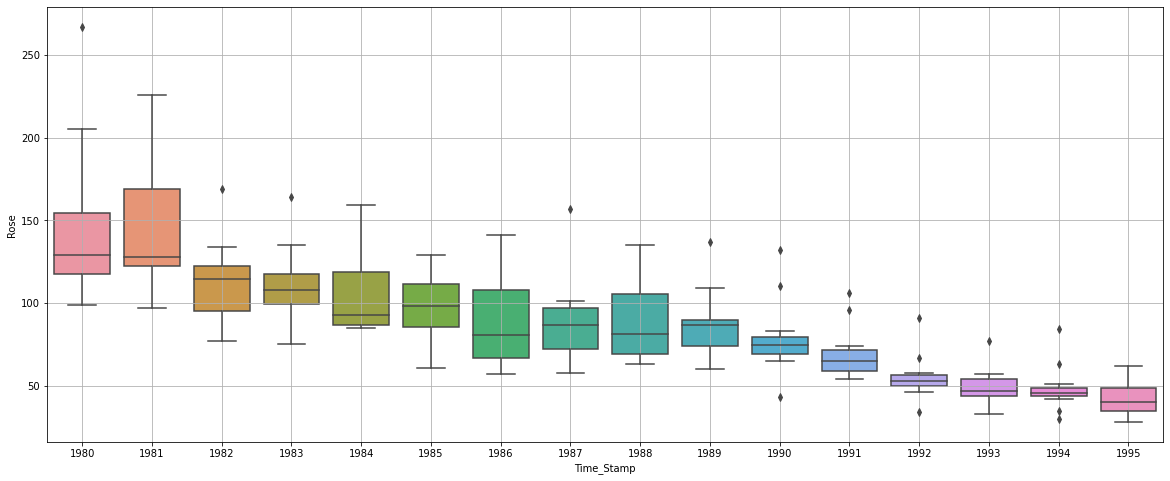

In [19]:
sns.boxplot(x = Rose_df.index.year,y = Rose_df['Rose'])
plt.grid();

The yearly boxplots also shows that the Sales gradually decreased in all the years.

#### Monthly Plot

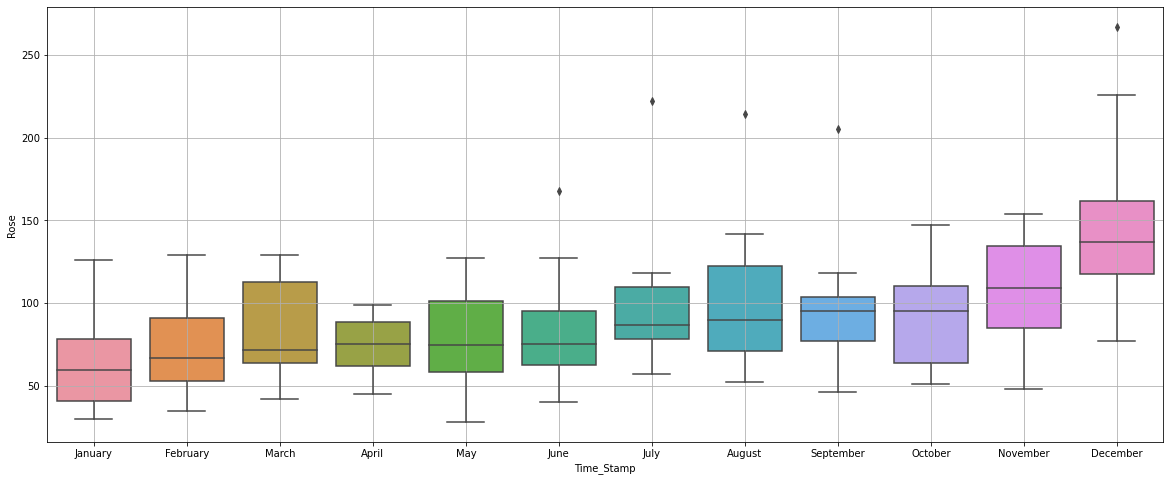

In [20]:
sns.boxplot(x = Rose_df.index.month_name(),y = df['Rose'])
plt.grid();

There is a clear distinction of Sales within different months spread across various years. The highest such numbers are being recorded in the month of November-December across various years.

#### Plotting a time series monthplot to understand the spread of accidents across different years and within different months across years.

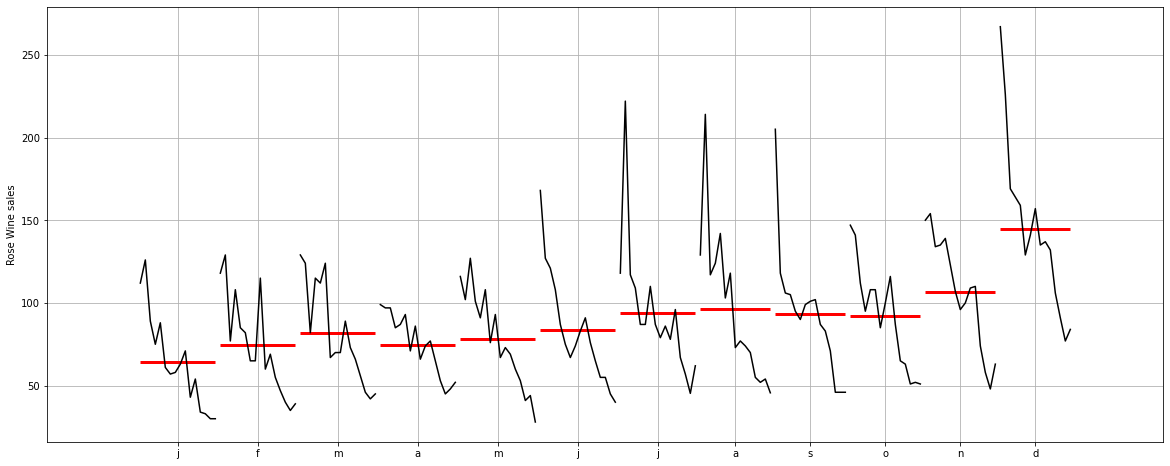

In [21]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(Rose_df['Rose'],ylabel='Rose Wine sales')
plt.grid();

This plot shows us the behaviour of the Time Series ('Rose Wine' in this case) across various months. The red line is the median value.

#### Plot a graph of monthly Rose Wine Sales across years

In [22]:
monthly_sales_across_years = pd.pivot_table(Rose_df, values = 'Rose', columns = Rose_df.index.year, index = Rose_df.index.month)
monthly_sales_across_years.style.highlight_max()

Time_Stamp,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Time_Stamp,,,,,,,,,,,,,,,,
1,112.000000,126.000000,89.000000,75.000000,88.000000,61.000000,57.000000,58.000000,63.000000,71.000000,43.000000,54.000000,34.000000,33.000000,30.000000,30.000000
2,118.000000,129.000000,77.000000,108.000000,85.000000,82.000000,65.000000,65.000000,115.000000,60.000000,69.000000,55.000000,47.000000,40.000000,35.000000,39.000000
3,129.000000,124.000000,82.000000,115.000000,112.000000,124.000000,67.000000,70.000000,70.000000,89.000000,73.000000,66.000000,56.000000,46.000000,42.000000,45.000000
4,99.000000,97.000000,97.000000,85.000000,87.000000,93.000000,71.000000,86.000000,66.000000,74.000000,77.000000,65.000000,53.000000,45.000000,48.000000,52.000000
5,116.000000,102.000000,127.000000,101.000000,91.000000,108.000000,76.000000,93.000000,67.000000,73.000000,69.000000,60.000000,53.000000,41.000000,44.000000,28.000000
6,168.000000,127.000000,121.000000,108.000000,87.000000,75.000000,67.000000,74.000000,83.000000,91.000000,76.000000,65.000000,55.000000,55.000000,45.000000,40.000000
7,118.000000,222.000000,117.000000,109.000000,87.000000,87.000000,110.000000,87.000000,79.000000,86.000000,78.000000,96.000000,67.000000,57.000000,45.333333,62.000000
8,129.000000,214.000000,117.000000,124.000000,142.000000,103.000000,118.000000,73.000000,77.000000,74.000000,70.000000,55.000000,52.000000,54.000000,45.666667,nan
9,205.000000,118.000000,106.000000,105.000000,95.000000,90.000000,99.000000,101.000000,102.000000,87.000000,83.000000,71.000000,46.000000,46.000000,46.000000,nan


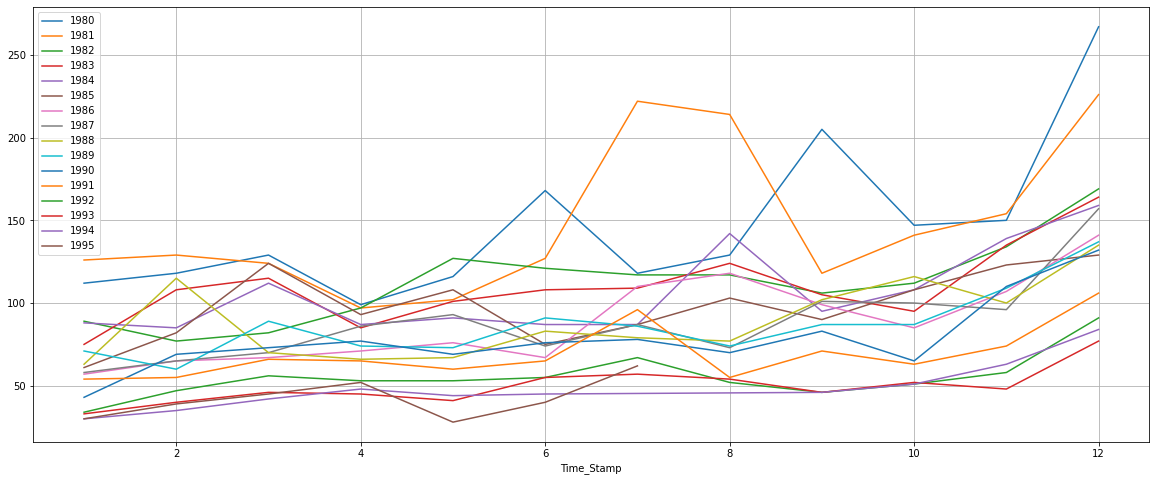

In [23]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

#### Plot the Empirical Cumulative Distribution.

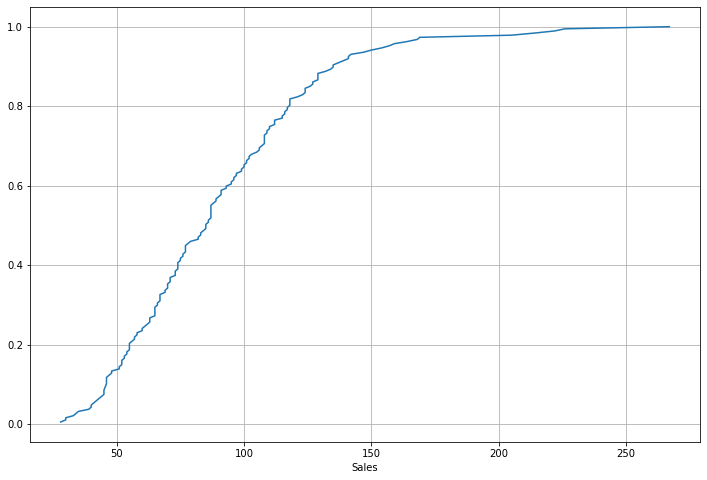

In [24]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (12, 8))
cdf = ECDF(Rose_df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

This particular graph tells us what percentage of data points refer to what number of Sales. 80% of the sales are below 120. Maximum sales is close 250

#### Plotting the average Sales per month and the month on month percentage change of Sales

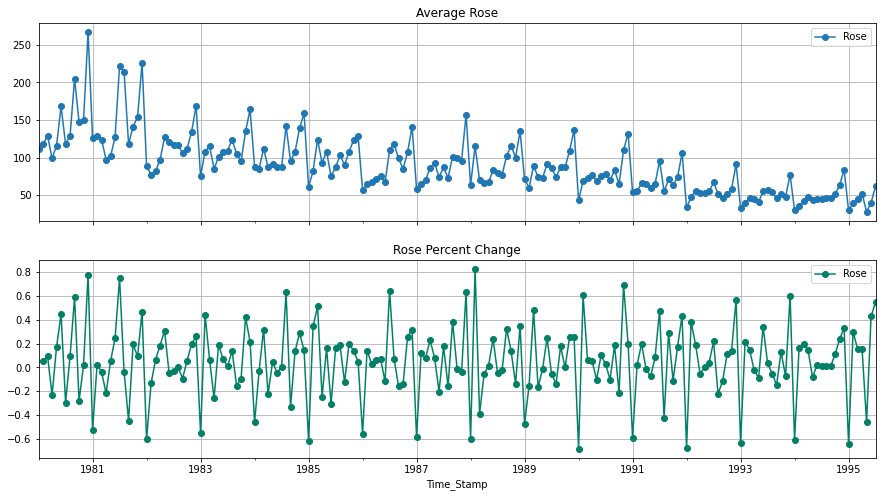

In [25]:
# group by date and get average Sparkling, and precent change
average    = Rose_df.groupby(Rose_df.index)["Rose"].mean()
pct_change = Rose_df.groupby(Rose_df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Rose over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Rose over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Percent Change",grid=True)

The above two graphs tells us the Average 'Rose' and the Percentage change of 'Rose' with respect to the time.

#### Decomposing the Time Series and plotting the different components.

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

#### Additive Decomposition

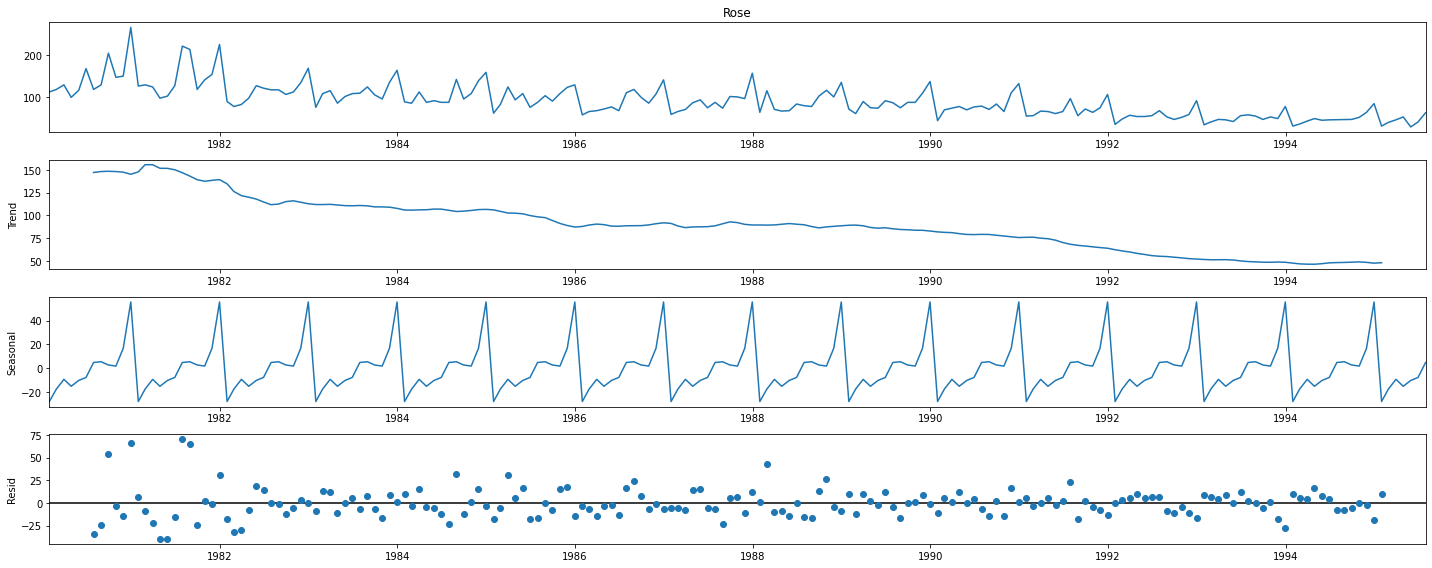

In [27]:
decomposition = seasonal_decompose(Rose_df['Rose'],model='additive')
decomposition.plot();

In [28]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.908647
1980-02-29   -17.435632
1980-03-31    -9.285830
1980-04-30   -15.098330
1980-05-31   -10.196544
1980-06-30    -7.678687
1980-07-31     4.896908
1980-08-31     5.499686
1980-09-30     2.774686
1980-10-31     1.871908
1980-11-30    16.846908
1980-12-31    55.713575
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980241
1980-08-31   -24.624686
1980-09-30    53.850314
1980-10-31    -2.955241
1980-11-30   -14.263575
1980-12-31    66.16

#### Multiplicative Decomposition

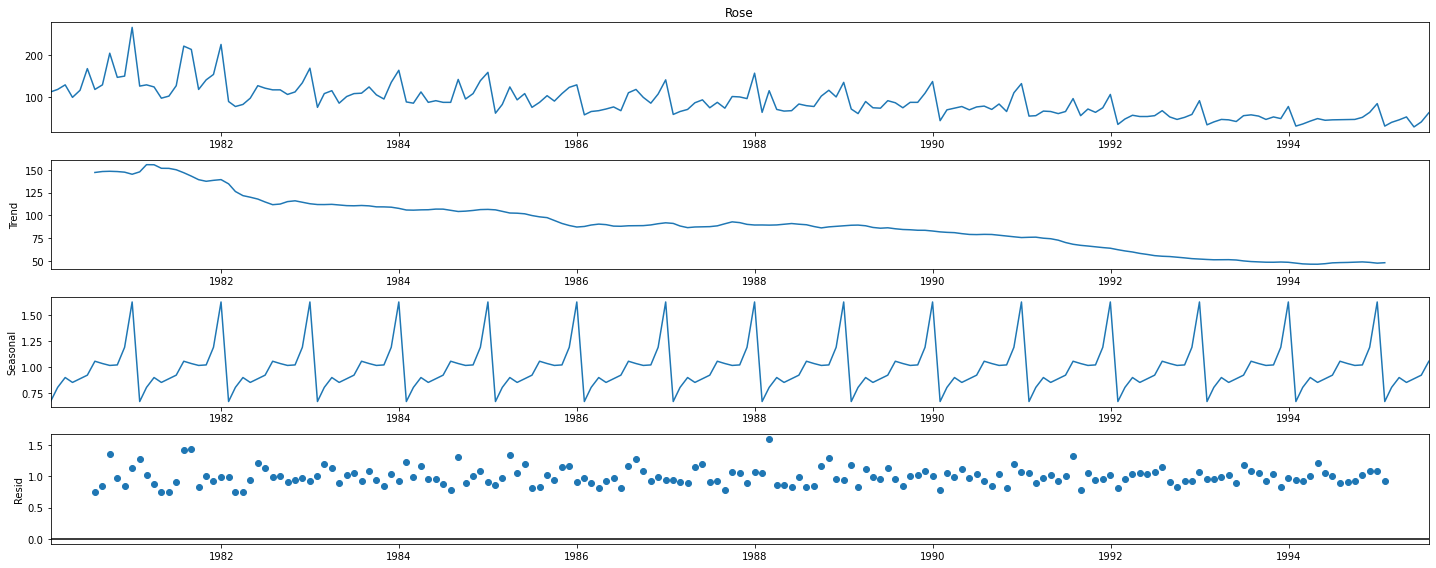

In [29]:
decomposition = seasonal_decompose(Rose_df['Rose'],model='multiplicative')
decomposition.plot();

For the multiplicative series, we see that a lot of residuals are located around 1.

In [30]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
1980-11-30    1.192349
1980-12-31    1.628646
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
1980-11-30    0.853378
1980-12-31    1.129646
Name: resid, dtype:

#### Plotting the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

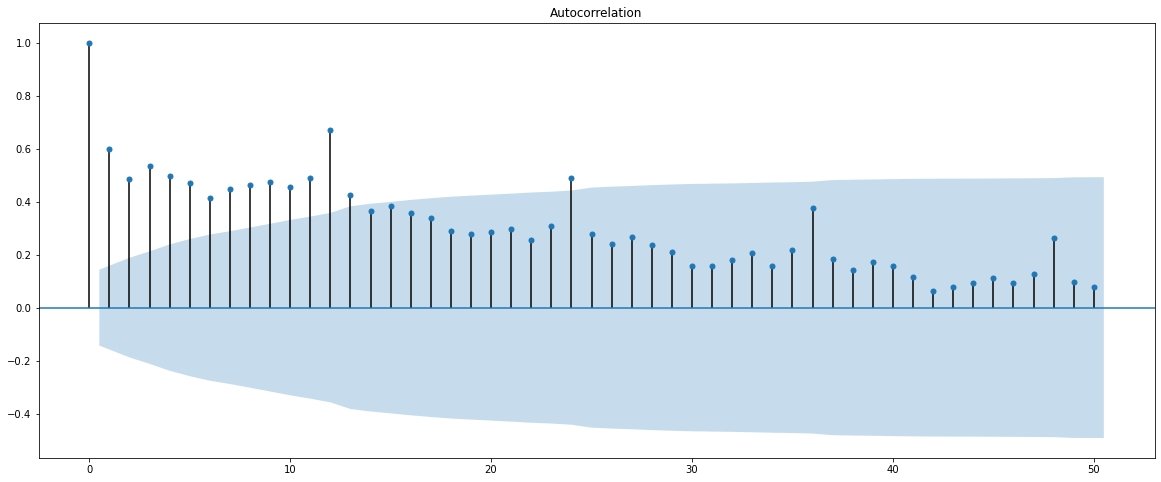

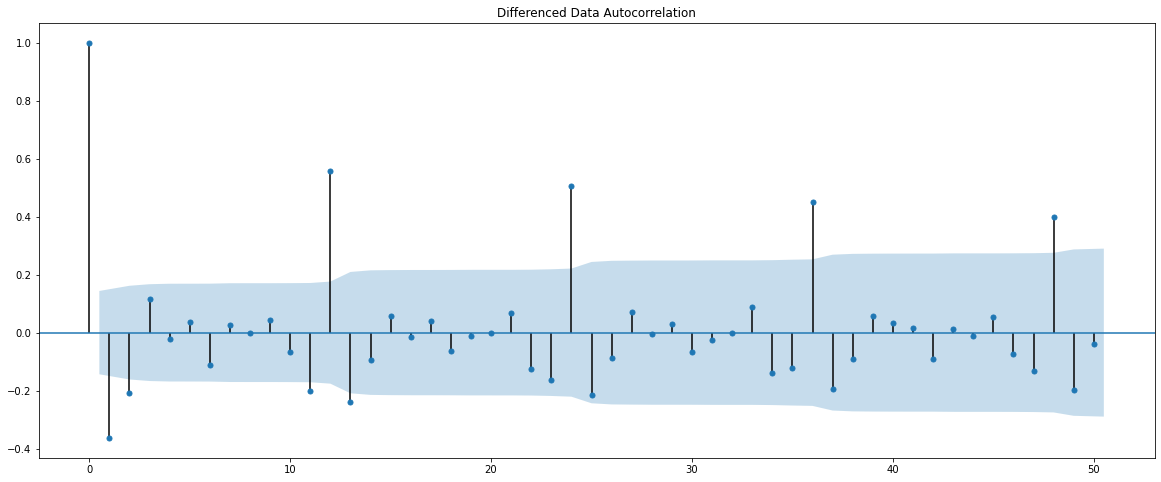

In [32]:
plot_acf(Rose_df['Rose'],lags=50)
plot_acf(Rose_df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

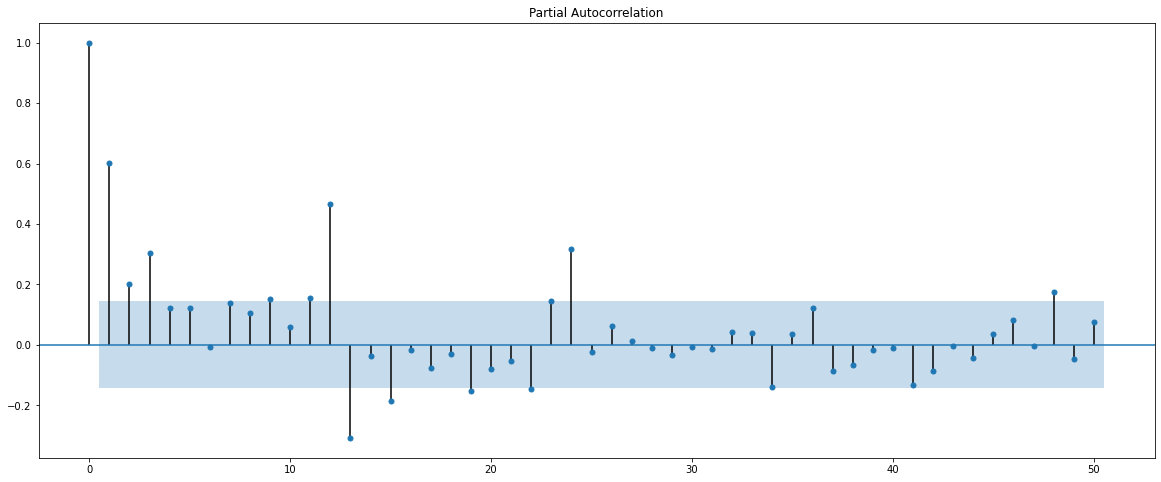

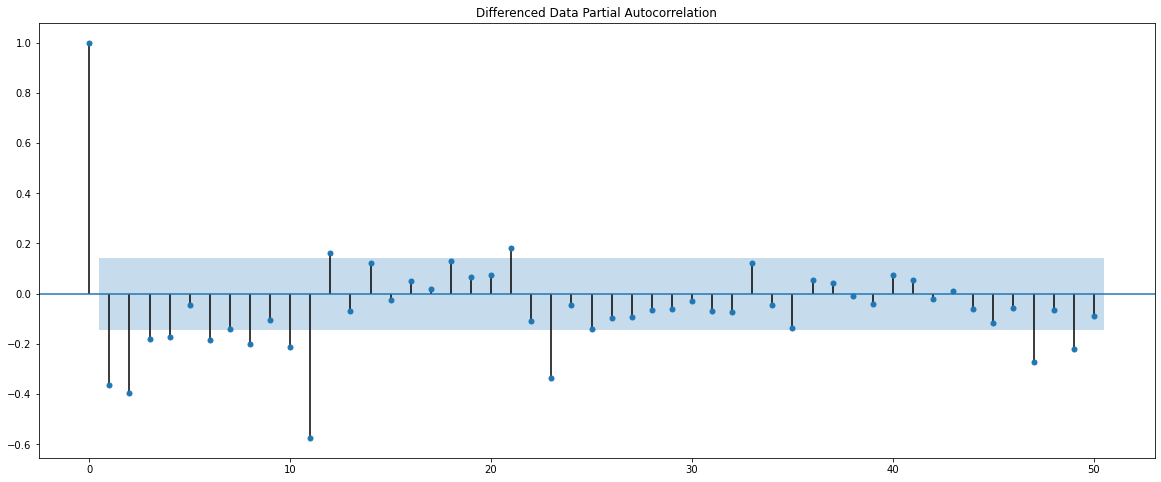

In [33]:
plot_pacf(Rose_df['Rose'],lags=50)
plot_pacf(Rose_df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From the above plots, we can say that there seems to be a seasonality in the data.

### Q 3 Split the data into training and test. The test data should start in 1991.

Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [34]:
train=Rose_df[Rose_df.index.year < 1991]
test=Rose_df[Rose_df.index.year >= 1991]

In [35]:
##to display multiple data frames from one cell
from IPython.display import display

In [36]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Last few rows of Training Data


,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


First few rows of Test Data


,Rose
Time_Stamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


Last few rows of Test Data


,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [37]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


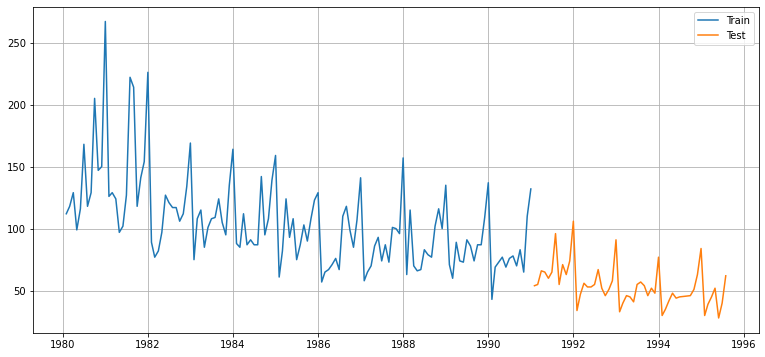

In [38]:
plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.legend(loc='best')
plt.grid();

### Q 4 Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.
### Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

### Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Rose Wine Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [39]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [40]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [41]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0    43
1991-02-28  55.0    44
1991-03-31  66.0    45
1991-04-30  65.0    46
1991-05-31  60.0    47 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0    93
1995-04-30  52.0    94
1995-05-31  28.0    95
1995-06-30  40.0    96
1995-07-31  62.0    97 



Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()

In [44]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

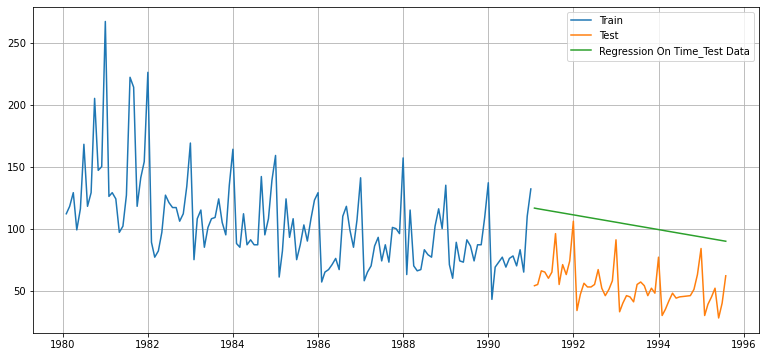

In [45]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Defining the accuracy metrics.

In [46]:
from sklearn import metrics

#### Model Evaluation

In [47]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 51.433


In [48]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,51.433312


### Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [49]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [50]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

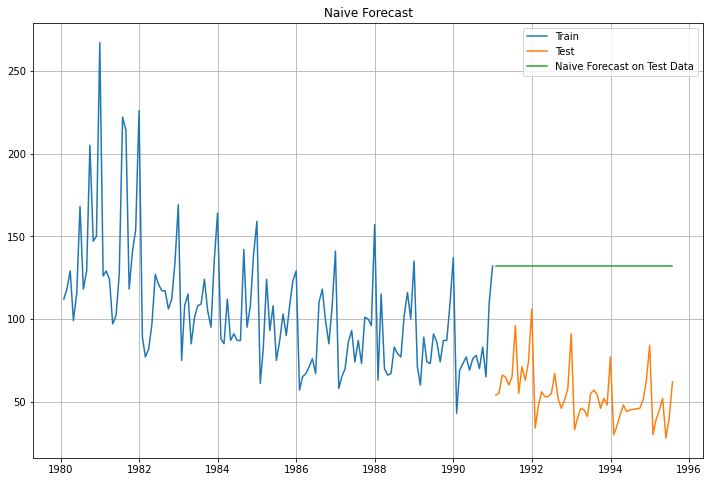

In [51]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#### Model Evaluation

In [52]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719


In [53]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,51.433312
NaiveModel,79.718773


### Model 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [54]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [55]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


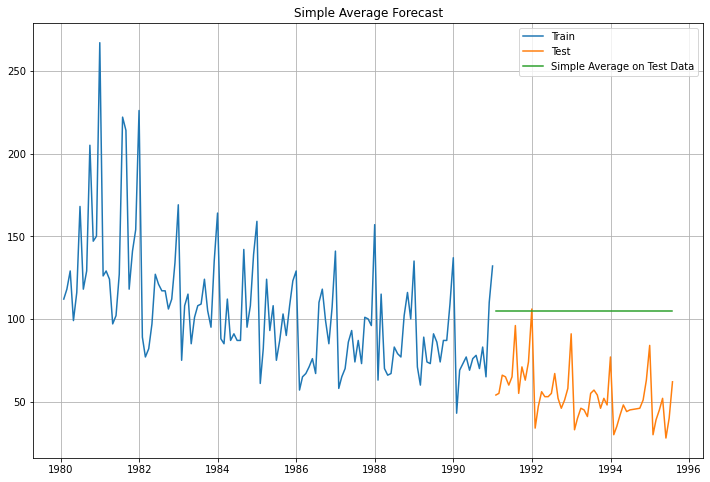

In [56]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#### Model Evaluation

In [57]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [58]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,51.433312
NaiveModel,79.718773
SimpleAverageModel,53.460570


### Model 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [59]:
MovingAverage = Rose_df.copy()
MovingAverage.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


#### Trailing moving averages

In [60]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


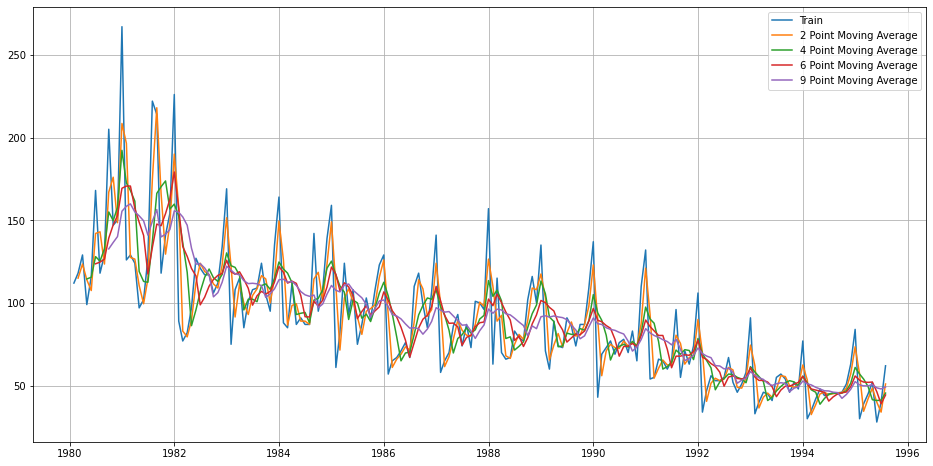

In [61]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [62]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[df.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[df.index.year >= 1991]

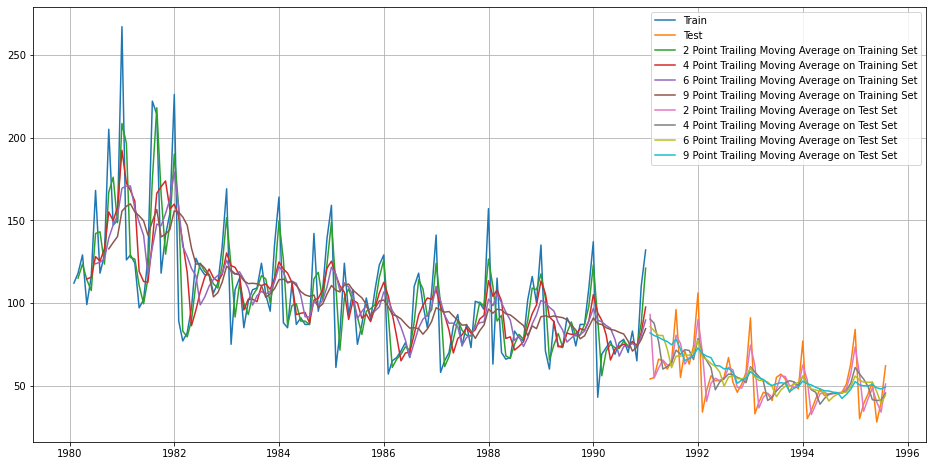

In [63]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

#### Model Evaluation

In [64]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728 


In [65]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,51.433312
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630


#### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

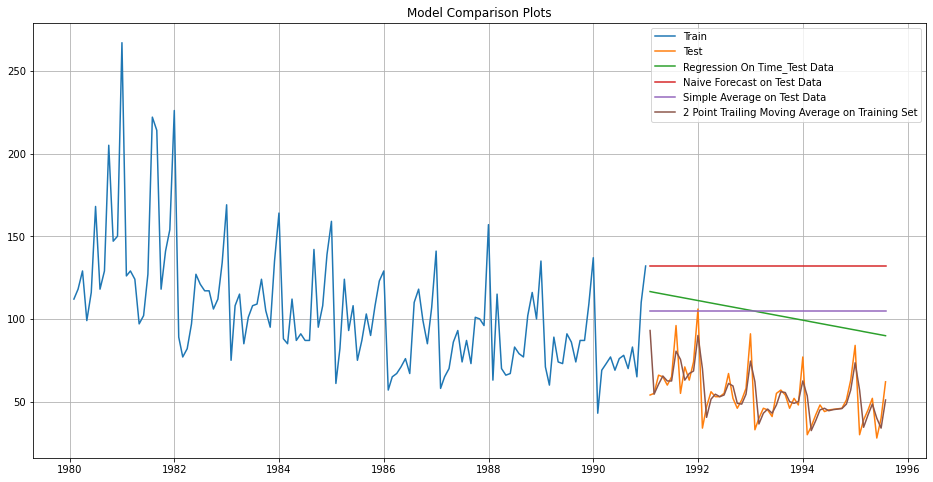

In [66]:
## Plotting on both Training and Test data

plt.figure(figsize=(16,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Model 5: Simple Exponential Smoothing

In [67]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [68]:
SES_train = train.copy()
SES_test = test.copy()

In [69]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\Users\deept\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [70]:
model_SES_autofit = model_SES.fit(optimized=True)

In [71]:
model_SES_autofit.params

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [72]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
pd.options.display.float_format = '{:.2f}'.format
SES_test.head()

,Rose,predict
Time_Stamp,,
1991-01-31,54.00,87.10
1991-02-28,55.00,87.10
1991-03-31,66.00,87.10
1991-04-30,65.00,87.10
1991-05-31,60.00,87.10


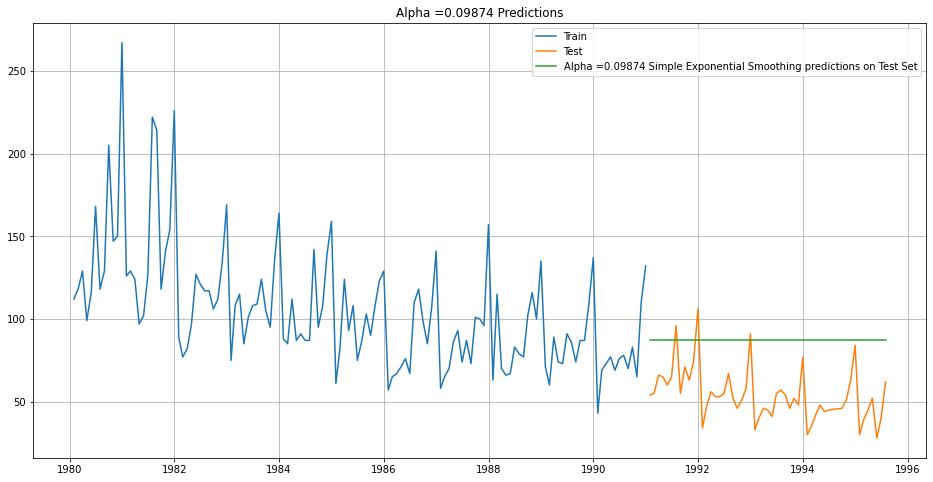

In [73]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.09874 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.09874 Predictions');

#### Model Evaluation for $\alpha$ = 0.09874 : Simple Exponential Smoothing

In [74]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.09874 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.09874 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.796


In [75]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.09874,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,51.43
NaiveModel,79.72
SimpleAverageModel,53.46
2pointTrailingMovingAverage,11.53
4pointTrailingMovingAverage,14.45
6pointTrailingMovingAverage,14.57
9pointTrailingMovingAverage,14.73
"Alpha=0.09874,SimpleExponentialSmoothing",36.80


#### Setting different alpha values.

###### The higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.

#### We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [76]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [77]:
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(len(test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

#### Model Evaluation

In [78]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
6,0.07,32.05,36.44
7,0.08,31.94,36.46
5,0.06,32.21,36.58
8,0.09,31.86,36.60
9,0.10,31.82,36.83
...,...,...,...
94,0.95,38.11,78.53
95,0.96,38.24,78.79
96,0.97,38.38,79.03
97,0.98,38.51,79.27


In [79]:
SES_test.head()

,Rose,predict,"(predict, 0.01)","(predict, 0.02)","(predict, 0.03)","(predict, 0.04)","(predict, 0.05)","(predict, 0.060000000000000005)","(predict, 0.06999999999999999)","(predict, 0.08)",...,"(predict, 0.9)","(predict, 0.91)","(predict, 0.92)","(predict, 0.93)","(predict, 0.9400000000000001)","(predict, 0.9500000000000001)","(predict, 0.9600000000000001)","(predict, 0.97)","(predict, 0.98)","(predict, 0.99)"
Time_Stamp,,,,,,,,,,,,,,,,,,,,,
1991-01-31,54.00,87.10,101.94,94.62,90.51,88.39,87.34,86.87,86.71,86.74,...,129.37,129.67,129.96,130.25,130.52,130.79,131.05,131.30,131.54,131.78
1991-02-28,55.00,87.10,101.94,94.62,90.51,88.39,87.34,86.87,86.71,86.74,...,129.37,129.67,129.96,130.25,130.52,130.79,131.05,131.30,131.54,131.78
1991-03-31,66.00,87.10,101.94,94.62,90.51,88.39,87.34,86.87,86.71,86.74,...,129.37,129.67,129.96,130.25,130.52,130.79,131.05,131.30,131.54,131.78
1991-04-30,65.00,87.10,101.94,94.62,90.51,88.39,87.34,86.87,86.71,86.74,...,129.37,129.67,129.96,130.25,130.52,130.79,131.05,131.30,131.54,131.78
1991-05-31,60.00,87.10,101.94,94.62,90.51,88.39,87.34,86.87,86.71,86.74,...,129.37,129.67,129.96,130.25,130.52,130.79,131.05,131.30,131.54,131.78


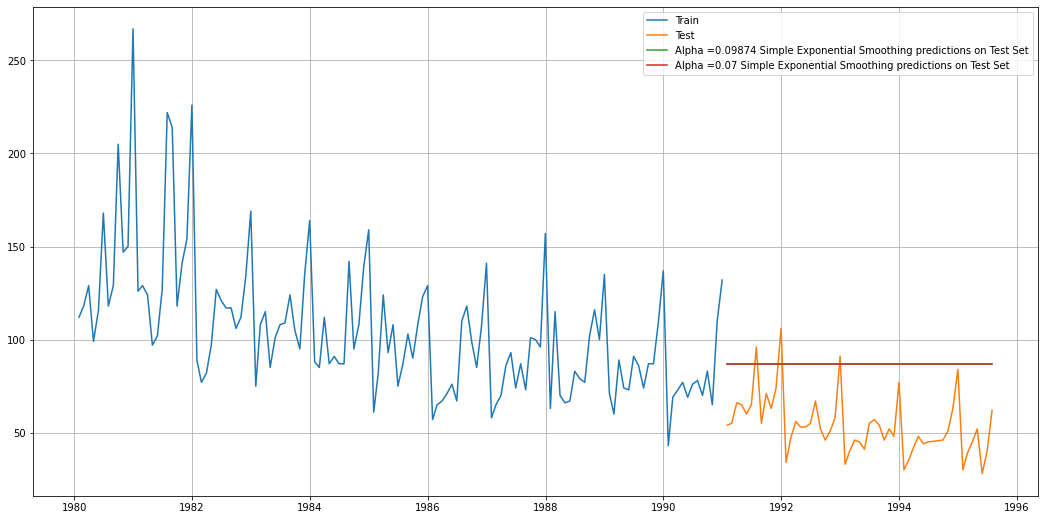

In [80]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.09874 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.06999999999999999], label='Alpha =0.07 Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [81]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.07,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
RegressionOnTime,51.43
NaiveModel,79.72
SimpleAverageModel,53.46
2pointTrailingMovingAverage,11.53
4pointTrailingMovingAverage,14.45
6pointTrailingMovingAverage,14.57
9pointTrailingMovingAverage,14.73
"Alpha=0.09874,SimpleExponentialSmoothing",36.80
"Alpha=0.07,SimpleExponentialSmoothing",36.44


### Model 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [82]:
DES_train = train.copy()
DES_test = test.copy()

In [83]:
model_DES = Holt(DES_train['Rose'])

C:\Users\deept\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [84]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [85]:
for i in np.arange(0.01,0.50,0.01):
    for j in np.arange(0.01,0.50,0.01):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(len(test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [86]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.01,0.01,270.58,450.25
1,0.01,0.02,235.21,282.16
2,0.01,0.03,205.58,151.84
3,0.01,0.04,181.21,62.08
4,0.01,0.05,161.60,57.42
...,...,...,...,...
2396,0.49,0.45,39.01,541.55
2397,0.49,0.46,39.11,550.37
2398,0.49,0.47,39.21,559.03
2399,0.49,0.48,39.30,567.55


Let us sort the data frame in the ascending ordering of the 'Test RMSE' values.

In [87]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
193,0.04,0.47,37.39,14.56
122,0.03,0.25,43.73,14.68
150,0.04,0.04,61.52,14.90
192,0.04,0.46,37.49,14.91
87,0.02,0.39,47.76,14.98


In [88]:
DES_test.tail()

,Rose,"(predict, 0.01, 0.01)","(predict, 0.01, 0.02)","(predict, 0.01, 0.03)","(predict, 0.01, 0.04)","(predict, 0.01, 0.05)","(predict, 0.01, 0.060000000000000005)","(predict, 0.01, 0.06999999999999999)","(predict, 0.01, 0.08)","(predict, 0.01, 0.09)",...,"(predict, 0.49, 0.4)","(predict, 0.49, 0.41000000000000003)","(predict, 0.49, 0.42000000000000004)","(predict, 0.49, 0.43)","(predict, 0.49, 0.44)","(predict, 0.49, 0.45)","(predict, 0.49, 0.46)","(predict, 0.49, 0.47000000000000003)","(predict, 0.49, 0.48000000000000004)","(predict, 0.49, 0.49)"
Time_Stamp,,,,,,,,,,,,,,,,,,,,,
1995-03-31,45.00,564.91,343.12,170.88,41.00,-52.98,-116.78,-155.46,-173.54,-174.94,...,809.02,824.30,839.30,854.03,868.49,882.70,896.65,910.36,923.84,937.11
1995-04-30,52.00,567.68,343.45,169.44,38.33,-56.41,-120.59,-159.35,-177.26,-178.31,...,822.65,838.22,853.51,868.53,883.27,897.75,911.98,925.96,939.70,953.22
1995-05-31,28.00,570.46,343.79,167.99,35.66,-59.84,-124.40,-163.24,-180.99,-181.69,...,836.27,852.14,867.72,883.02,898.05,912.81,927.31,941.55,955.56,969.34
1995-06-30,40.00,573.24,344.12,166.55,32.99,-63.27,-128.21,-167.13,-184.71,-185.06,...,849.89,866.06,881.93,897.52,912.83,927.87,942.64,957.15,971.42,985.46
1995-07-31,62.00,576.02,344.46,165.11,30.32,-66.70,-132.03,-171.02,-188.43,-188.43,...,863.52,879.98,896.15,912.02,927.61,942.92,957.97,972.75,987.28,1001.58


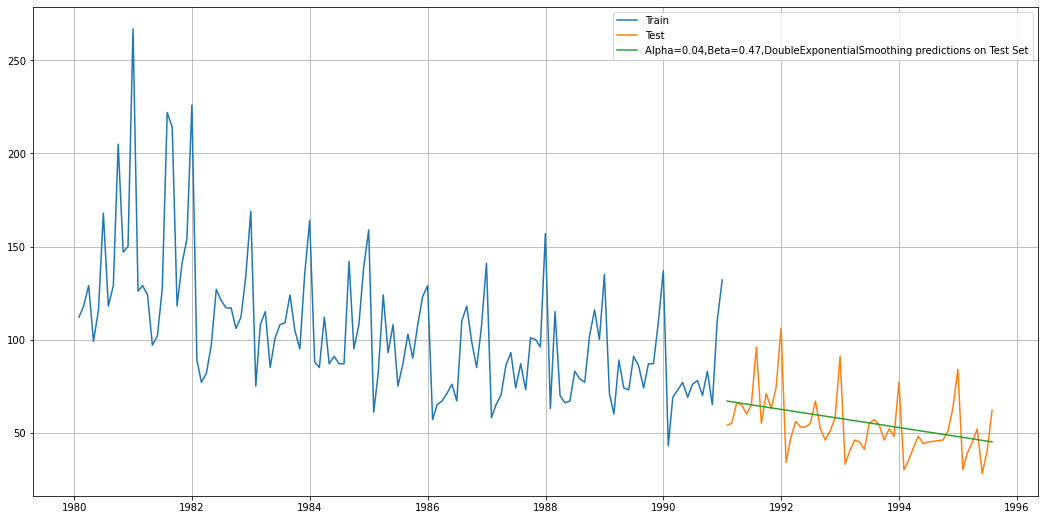

In [89]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict',0.04,0.47000000000000003], label='Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [90]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE
RegressionOnTime,51.43
NaiveModel,79.72
SimpleAverageModel,53.46
2pointTrailingMovingAverage,11.53
4pointTrailingMovingAverage,14.45
6pointTrailingMovingAverage,14.57
9pointTrailingMovingAverage,14.73
"Alpha=0.09874,SimpleExponentialSmoothing",36.80
"Alpha=0.07,SimpleExponentialSmoothing",36.44
"Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing",14.56


## Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [91]:
TES_train = train.copy()
TES_test = test.copy()

In [92]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='additive',freq='M')

In [93]:
model_TES_autofit = model_TES.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [94]:
model_TES_autofit.params

{'smoothing_level': 0.08863830320528249,
 'smoothing_trend': 4.108217096893454e-06,
 'smoothing_seasonal': 5.24162348371366e-08,
 'damping_trend': nan,
 'initial_level': 77.07931882365665,
 'initial_trend': -0.549008945400508,
 'initial_seasons': array([ 38.66747679,  51.00822176,  58.9981034 ,  48.34675   ,
         57.12520488,  62.56658922,  72.49775197,  78.54589082,
         74.55040899,  72.70253166,  90.75516685, 133.03428153]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [95]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,auto_predict
Time_Stamp,,
1991-01-31,54.00,42.71
1991-02-28,55.00,54.50
1991-03-31,66.00,61.94
1991-04-30,65.00,50.74
1991-05-31,60.00,58.97


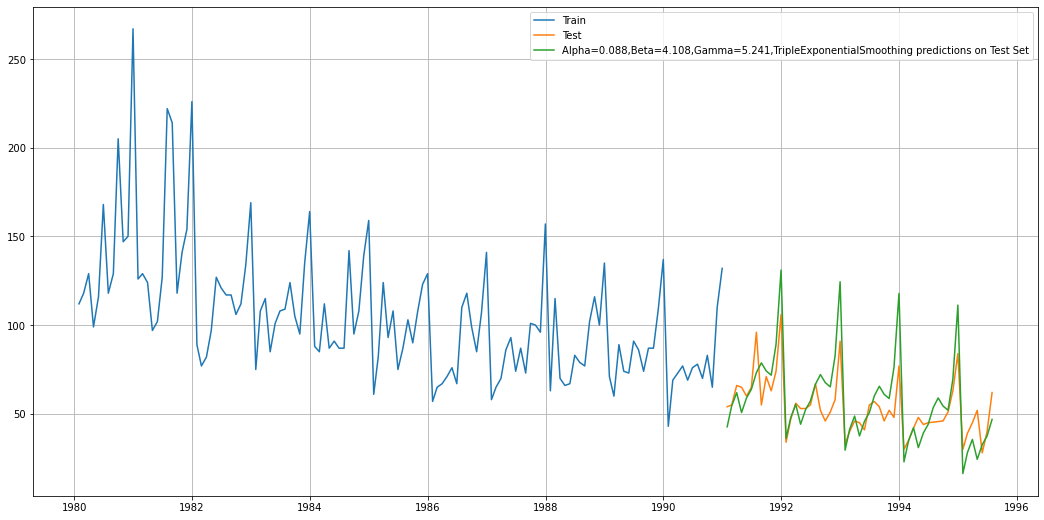

In [96]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.088,Beta=4.108,Gamma=5.241,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [97]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.088,Beta=4.108,Gamma=5.241, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.088,Beta=4.108,Gamma=5.241, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 14.234


In [98]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.088,Beta=4.108,Gamma=5.241,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,51.43
NaiveModel,79.72
SimpleAverageModel,53.46
2pointTrailingMovingAverage,11.53
4pointTrailingMovingAverage,14.45
6pointTrailingMovingAverage,14.57
9pointTrailingMovingAverage,14.73
"Alpha=0.09874,SimpleExponentialSmoothing",36.80
"Alpha=0.07,SimpleExponentialSmoothing",36.44
"Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing",14.56


In [99]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [103]:
for i in np.arange(0.0,0.05,0.01):
    for j in np.arange(2.5,4,0.1):
        for k in np.arange(3,5,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
             
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [107]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.01,2.50,3.00,63874.51,1461228.22
1,0.01,2.50,3.10,85914.48,1993258.13
2,0.01,2.50,3.20,114594.94,2693202.47
3,0.01,2.50,3.30,151674.46,3607014.97
4,0.01,2.50,3.40,199327.00,4791550.38
...,...,...,...,...,...
34116,0.04,3.90,4.50,26172848.52,1419269677.74
34117,0.04,3.90,4.60,31163857.71,1607931990.08
34118,0.04,3.90,4.70,37086468.12,1819949051.52
34119,0.04,3.90,4.80,44109837.01,2058627798.72


In [108]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
32881,0.00,3.80,3.00,11990.09,68654.22
32801,0.00,3.40,3.00,11990.09,68654.22
32821,0.00,3.50,3.00,11990.09,68654.22
32701,0.00,2.90,3.00,11990.09,68654.22
32641,0.00,2.60,3.00,11990.09,68654.22


In [114]:
TES_test.iloc[0:5,250:270]

,"(predict, 0.01, 3.700000000000001, 3.8000000000000007)","(predict, 0.01, 3.700000000000001, 3.900000000000001)","(predict, 0.01, 3.700000000000001, 4.000000000000001)","(predict, 0.01, 3.700000000000001, 4.100000000000001)","(predict, 0.01, 3.700000000000001, 4.200000000000001)","(predict, 0.01, 3.700000000000001, 4.300000000000001)","(predict, 0.01, 3.700000000000001, 4.400000000000001)","(predict, 0.01, 3.700000000000001, 4.500000000000002)","(predict, 0.01, 3.700000000000001, 4.600000000000001)","(predict, 0.01, 3.700000000000001, 4.700000000000001)","(predict, 0.01, 3.700000000000001, 4.800000000000002)","(predict, 0.01, 3.700000000000001, 4.900000000000002)","(predict, 0.01, 3.800000000000001, 3.0)","(predict, 0.01, 3.800000000000001, 3.1)","(predict, 0.01, 3.800000000000001, 3.2)","(predict, 0.01, 3.800000000000001, 3.3000000000000003)","(predict, 0.01, 3.800000000000001, 3.4000000000000004)","(predict, 0.01, 3.800000000000001, 3.5000000000000004)","(predict, 0.01, 3.800000000000001, 3.6000000000000005)","(predict, 0.01, 3.800000000000001, 3.7000000000000006)"
Time_Stamp,,,,,,,,,,,,,,,,,,,,
1991-01-31,9175869.69,11444270.09,14186738.94,17484067.40,21427497.03,26119552.90,31674868.39,38220987.77,45899130.84,54864901.04,65288916.70,77357341.69,1233668.33,1632595.79,2141521.24,2785714.39,3595084.01,4604802.67,5855979.02,7396375.85
1991-02-28,9558982.28,12050945.16,15108980.48,18843188.50,23381546.79,28872242.52,35486233.69,43420054.08,52898876.76,64179851.35,77555730.55,93358801.47,1157936.28,1539648.94,2031449.17,2660729.19,3460626.37,4471003.50,5739557.54,7323068.91
1991-03-31,10229984.08,13148246.45,16812989.53,21392962.57,27089989.71,34144455.62,42841537.00,53518259.35,66571464.64,82466782.14,101748701.10,125051851.69,1029095.69,1385985.68,1855670.11,2470223.58,3269735.63,4304016.64,5634601.81,7337093.60
1991-04-30,9421928.51,12273314.37,15901291.48,20492016.39,26269958.24,33504483.06,42517351.78,53691229.99,67479314.67,84416191.54,105130044.57,130356348.09,771868.97,1052860.45,1430801.07,1936269.80,2608263.49,3496131.15,4661863.94,6182790.20
1991-05-31,6827667.97,9091500.31,12033469.53,15831211.05,20701920.58,26909647.00,34773665.12,44678051.68,57082598.41,72535206.43,91685918.09,115302753.98,343345.87,480529.96,675643.40,951146.70,1336800.52,1871567.95,2605902.31,3604479.22


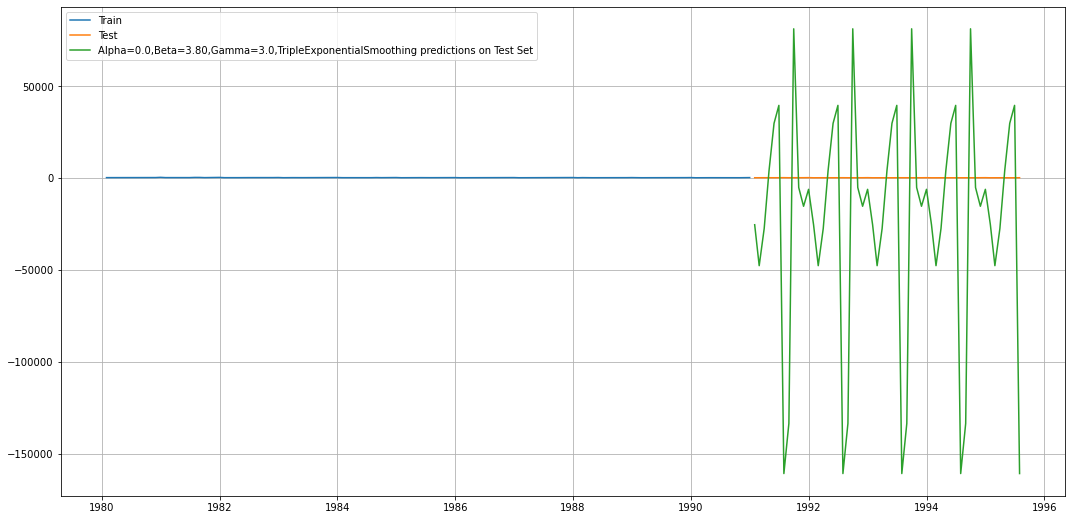

In [116]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict',0.00,3.800000000000001,3.0], label='Alpha=0.0,Beta=3.80,Gamma=3.0,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [118]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.0,Beta=3.80,Gamma=3.0,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE
RegressionOnTime,51.43
NaiveModel,79.72
SimpleAverageModel,53.46
2pointTrailingMovingAverage,11.53
4pointTrailingMovingAverage,14.45
6pointTrailingMovingAverage,14.57
9pointTrailingMovingAverage,14.73
"Alpha=0.09874,SimpleExponentialSmoothing",36.80
"Alpha=0.07,SimpleExponentialSmoothing",36.44
"Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing",14.56


In [119]:
resultsDf_8_3.head()

,Test RMSE
"Alpha=0.0,Beta=3.80,Gamma=3.0,TripleExponentialSmoothing",68654.22


In [120]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
2pointTrailingMovingAverage,11.53
"Alpha=0.088,Beta=4.108,Gamma=5.241,TripleExponentialSmoothing",14.23
4pointTrailingMovingAverage,14.45
"Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing",14.56
6pointTrailingMovingAverage,14.57
9pointTrailingMovingAverage,14.73
"Alpha=0.07,SimpleExponentialSmoothing",36.44
"Alpha=0.09874,SimpleExponentialSmoothing",36.80
RegressionOnTime,51.43
SimpleAverageModel,53.46


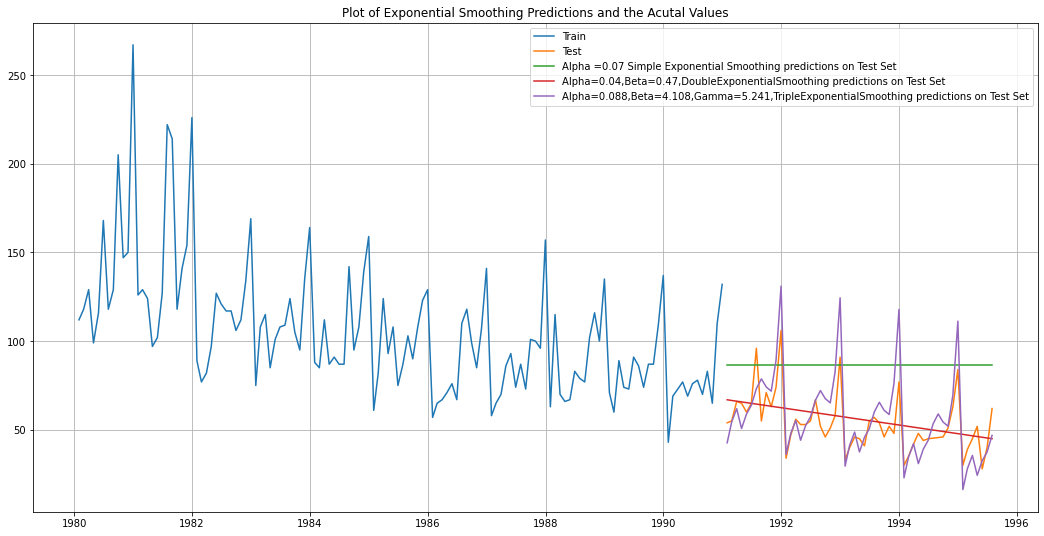

In [121]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_test['predict', 0.06999999999999999], label='Alpha =0.07 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.04,0.47000000000000003], label='Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['auto_predict'], label='Alpha=0.088,Beta=4.108,Gamma=5.241,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

### Q 5 Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
### Note: Stationarity should be checked at alpha = 0.05.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [122]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False) ## You plot will stay open - will be seen always
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

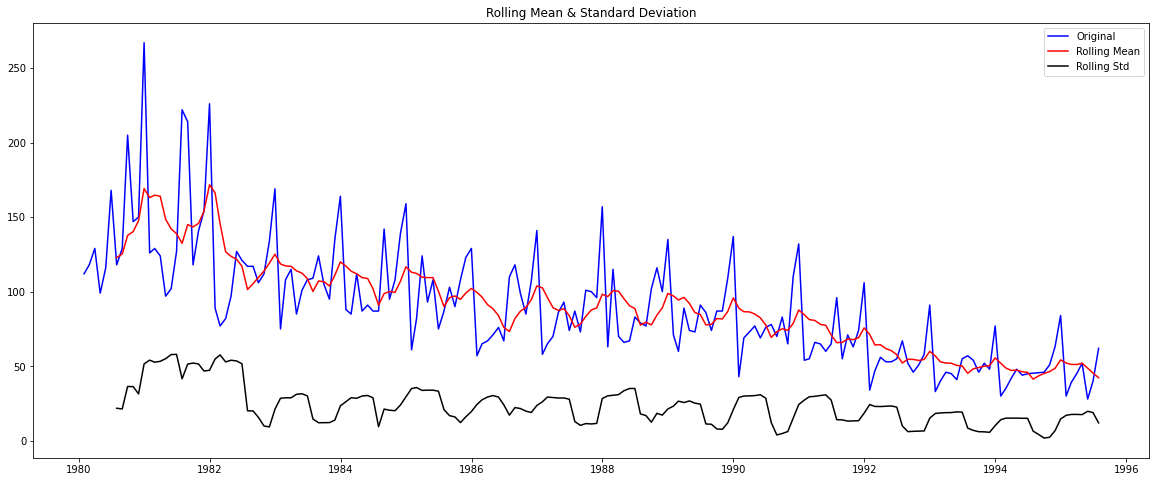

Results of Dickey-Fuller Test:
Test Statistic                 -1.88
p-value                         0.34
#Lags Used                     13.00
Number of Observations Used   173.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64 



In [123]:
test_stationarity(Rose_df['Rose'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

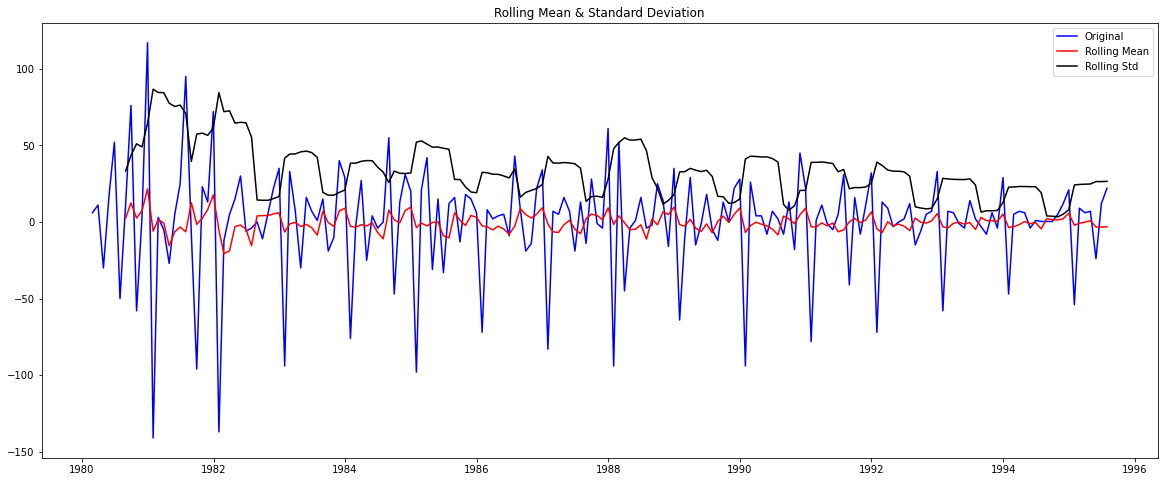

Results of Dickey-Fuller Test:
Test Statistic                 -8.04
p-value                         0.00
#Lags Used                     12.00
Number of Observations Used   173.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64 



In [124]:
test_stationarity(Rose_df['Rose'].diff().dropna())

We see that at $\alpha$ = 0.05 the Time Series is indeed stationary.

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.

### Q 6 Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### Building Automated Version of ARIMA Model

In [125]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [126]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [127]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464045
ARIMA(0, 1, 2) - AIC:1276.8353720852406
ARIMA(1, 1, 0) - AIC:1319.348310580188
ARIMA(1, 1, 1) - AIC:1277.7757525778347
ARIMA(1, 1, 2) - AIC:1277.3592242867721
ARIMA(2, 1, 0) - AIC:1300.6092611747547
ARIMA(2, 1, 1) - AIC:1279.0456894093202
ARIMA(2, 1, 2) - AIC:1279.2986939365073


In [128]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1276.84
5,"(1, 1, 2)",1277.36
4,"(1, 1, 1)",1277.78
7,"(2, 1, 1)",1279.05
8,"(2, 1, 2)",1279.30
1,"(0, 1, 1)",1280.73
6,"(2, 1, 0)",1300.61
3,"(1, 1, 0)",1319.35
0,"(0, 1, 0)",1335.15


In [129]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Sun, 25 Jul 2021   AIC                           1276.835
Time:                        21:10:49   BIC                           1288.336
Sample:                    02-29-1980   HQIC                          1281.509
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

#### Predict on the Test Set using this model and evaluate the model.

In [130]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [131]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.617828821296156


In [132]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse]}
        ,index=['ARIMA(0,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

,Test RMSE
RegressionOnTime,51.43
NaiveModel,79.72
SimpleAverageModel,53.46
2pointTrailingMovingAverage,11.53
4pointTrailingMovingAverage,14.45
6pointTrailingMovingAverage,14.57
9pointTrailingMovingAverage,14.73
"Alpha=0.09874,SimpleExponentialSmoothing",36.80
"Alpha=0.07,SimpleExponentialSmoothing",36.44
"Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing",14.56


In [133]:
auto_ARIMA = ARIMA(train['Rose'], order=(1,1,1),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -634.888
Method:                       css-mle   S.D. of innovations             30.280
Date:                Sun, 25 Jul 2021   AIC                           1277.776
Time:                        21:12:11   BIC                           1289.277
Sample:                    02-29-1980   HQIC                          1282.449
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4871      0.086     -5.656      0.000      -0.656      -0.318
ar.L1.D.Rose     0.2006      0.087      2.293      0.022       0.029       0.372
ma.L1.D.Rose    -0.9999      0.035    -28.64

In [134]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [135]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.734102897337348


In [136]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(1,1,1)'])

resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

,Test RMSE
RegressionOnTime,51.43
NaiveModel,79.72
SimpleAverageModel,53.46
2pointTrailingMovingAverage,11.53
4pointTrailingMovingAverage,14.45
6pointTrailingMovingAverage,14.57
9pointTrailingMovingAverage,14.73
"Alpha=0.09874,SimpleExponentialSmoothing",36.80
"Alpha=0.07,SimpleExponentialSmoothing",36.44
"Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing",14.56


### Building Automated version of SARIMA Model

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

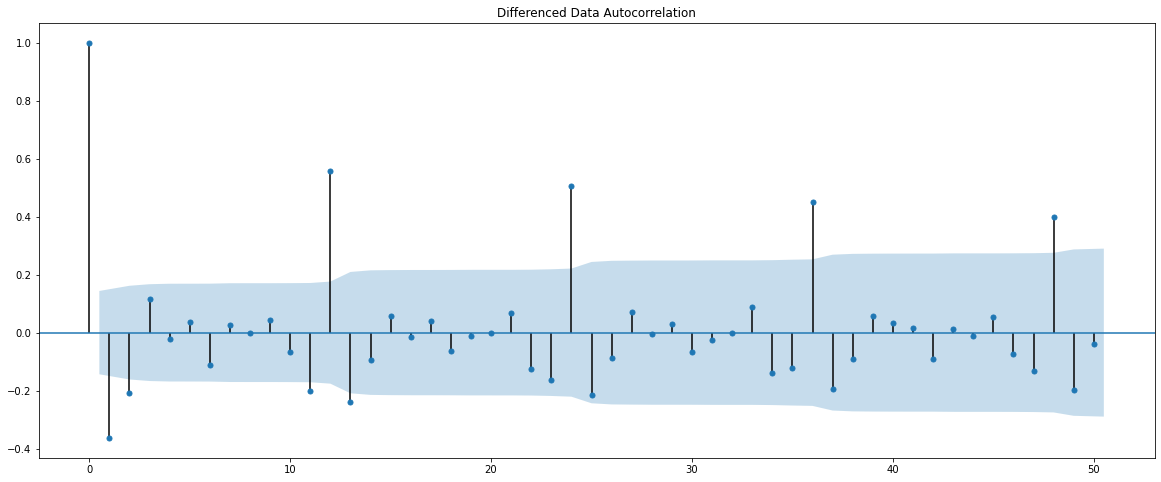

In [137]:
plot_acf(Rose_df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 12 as well as 24. We will run our auto SARIMA models by setting seasonality at both 12 and 24

#### Setting the seasonality as 12 for the first iteration of the auto SARIMA model.

In [138]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [139]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [140]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,  ## by force you can make it TS stationary
                                            enforce_invertibility=False) ## Alpha and Beta should be unique
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.423082720733
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380911
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869687422
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913640047369
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794541633533
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.573540934358
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097263765
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825916956
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049709526
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324695233
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434331286036
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573482601807
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.598286619425
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430440266
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988252664927
SARIMA(0, 1, 2)x(0, 0, 0

In [141]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.94
80,"(2, 1, 2)","(2, 0, 2, 12)",890.67
69,"(2, 1, 1)","(2, 0, 0, 12)",896.52
78,"(2, 1, 2)","(2, 0, 0, 12)",897.35
70,"(2, 1, 1)","(2, 0, 1, 12)",897.64


In [142]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 25 Jul 2021   AIC                            887.938
Time:                                    21:14:31   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8428    174.487     -0.005      0.996    -342.831     341.145
ma.L2         -0.1572     27.463   

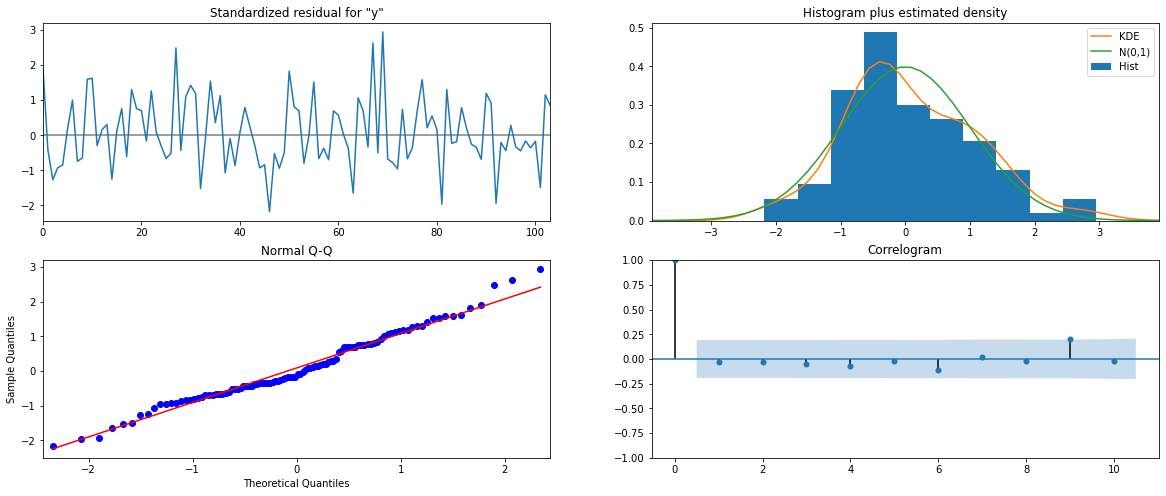

In [143]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots. 

#### Predict on the Test Set using this model and evaluate the model.

In [144]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [145]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.87,15.93,31.65,94.09
1,70.54,16.15,38.89,102.19
2,77.36,16.15,45.71,109.01
3,76.21,16.15,44.56,107.86
4,72.75,16.15,41.10,104.40


In [146]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.92936799005941


In [147]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf

,Test RMSE
RegressionOnTime,51.43
NaiveModel,79.72
SimpleAverageModel,53.46
2pointTrailingMovingAverage,11.53
4pointTrailingMovingAverage,14.45
6pointTrailingMovingAverage,14.57
9pointTrailingMovingAverage,14.73
"Alpha=0.09874,SimpleExponentialSmoothing",36.80
"Alpha=0.07,SimpleExponentialSmoothing",36.44
"Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing",14.56


We see that we have huge gain the RMSE value by including the seasonal parameters as well.

#### Setting the seasonality as 24 for the second iteration of the auto SARIMA model.

In [148]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 24)
Model: (0, 1, 2)(0, 0, 2, 24)
Model: (1, 1, 0)(1, 0, 0, 24)
Model: (1, 1, 1)(1, 0, 1, 24)
Model: (1, 1, 2)(1, 0, 2, 24)
Model: (2, 1, 0)(2, 0, 0, 24)
Model: (2, 1, 1)(2, 0, 1, 24)
Model: (2, 1, 2)(2, 0, 2, 24)


In [149]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [150]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 24) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 24) - AIC:1004.5278739813705
SARIMA(0, 1, 0)x(0, 0, 2, 24) - AIC:778.1768181054998
SARIMA(0, 1, 0)x(1, 0, 0, 24) - AIC:989.7650321002201
SARIMA(0, 1, 0)x(1, 0, 1, 24) - AIC:982.9166792438234
SARIMA(0, 1, 0)x(1, 0, 2, 24) - AIC:748.8116881033159
SARIMA(0, 1, 0)x(2, 0, 0, 24) - AIC:763.0763852398122
SARIMA(0, 1, 0)x(2, 0, 1, 24) - AIC:756.4495965023392
SARIMA(0, 1, 0)x(2, 0, 2, 24) - AIC:749.4696709878401
SARIMA(0, 1, 1)x(0, 0, 0, 24) - AIC:1263.5369097263765
SARIMA(0, 1, 1)x(0, 0, 1, 24) - AIC:951.9340613740759
SARIMA(0, 1, 1)x(0, 0, 2, 24) - AIC:728.3917719269028
SARIMA(0, 1, 1)x(1, 0, 0, 24) - AIC:935.9077882873041
SARIMA(0, 1, 1)x(1, 0, 1, 24) - AIC:921.742591813691
SARIMA(0, 1, 1)x(1, 0, 2, 24) - AIC:696.3398668044473
SARIMA(0, 1, 1)x(2, 0, 0, 24) - AIC:719.20888014182
SARIMA(0, 1, 1)x(2, 0, 1, 24) - AIC:712.3978381392403
SARIMA(0, 1, 1)x(2, 0, 2, 24) - AIC:697.8802266259038
SARIMA(0, 1, 2)x(0, 0, 0, 24

In [151]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
23,"(0, 1, 2)","(1, 0, 2, 24)",687.41
50,"(1, 1, 2)","(1, 0, 2, 24)",689.08
26,"(0, 1, 2)","(2, 0, 2, 24)",689.16
77,"(2, 1, 2)","(1, 0, 2, 24)",690.14
53,"(1, 1, 2)","(2, 0, 2, 24)",690.80


In [152]:
import statsmodels.api as sm

auto_SARIMA_24 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(1, 0, 2, 24),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_24 = auto_SARIMA_24.fit(maxiter=1000)
print(results_auto_SARIMA_24.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(1, 0, 2, 24)   Log Likelihood                -337.703
Date:                            Sun, 25 Jul 2021   AIC                            687.405
Time:                                    21:18:49   BIC                            701.697
Sample:                                         0   HQIC                           693.135
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9642      0.237     -4.074      0.000      -1.428      -0.500
ma.L2         -0.0566      0.139   

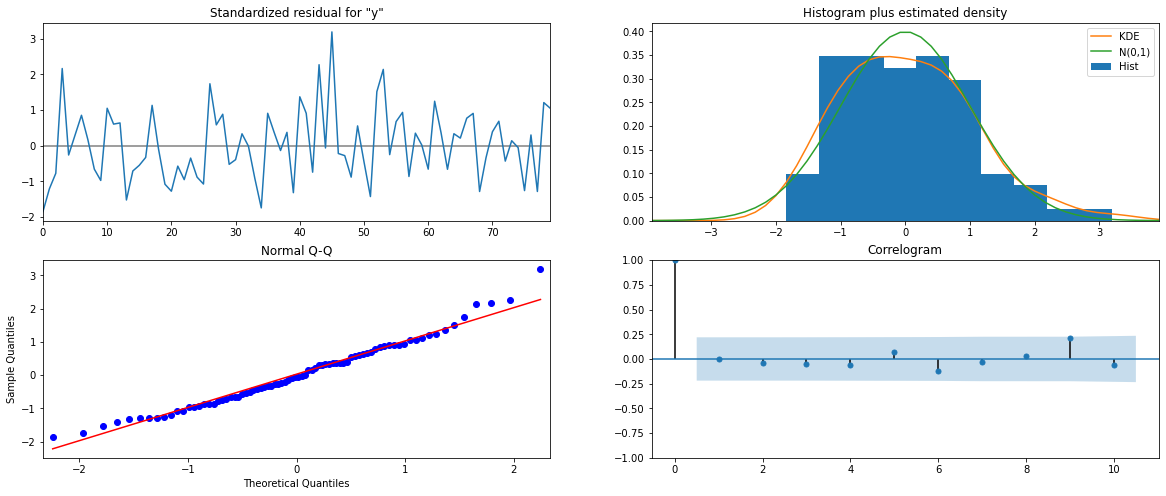

In [153]:
results_auto_SARIMA_24.plot_diagnostics()
plt.show()

Similar to the last iteration of the model where the seasonality parameter was taken as 12, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.

#### Predict on the Test Set using this model and evaluate the model.

In [154]:
predicted_auto_SARIMA_24 = results_auto_SARIMA_24.get_forecast(steps=len(test))

In [155]:
predicted_auto_SARIMA_24.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,57.52,14.80,28.52,86.52
1,66.25,14.85,37.15,95.35
2,80.70,14.85,51.59,109.81
3,68.60,14.85,39.49,97.71
4,75.32,14.86,46.20,104.44


In [156]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_24.predicted_mean,squared=False)
print(rmse)

19.93114544255051


In [157]:
resultsDf_12 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(1,0,2,24)'])

resultsDf = pd.concat([resultsDf, resultsDf_12])
resultsDf

,Test RMSE
RegressionOnTime,51.43
NaiveModel,79.72
SimpleAverageModel,53.46
2pointTrailingMovingAverage,11.53
4pointTrailingMovingAverage,14.45
6pointTrailingMovingAverage,14.57
9pointTrailingMovingAverage,14.73
"Alpha=0.09874,SimpleExponentialSmoothing",36.80
"Alpha=0.07,SimpleExponentialSmoothing",36.44
"Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing",14.56


We see that the RMSE value have reduced further when the seasonality parameter was changed to 24.

### Q 7 Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

#### 1. Building a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

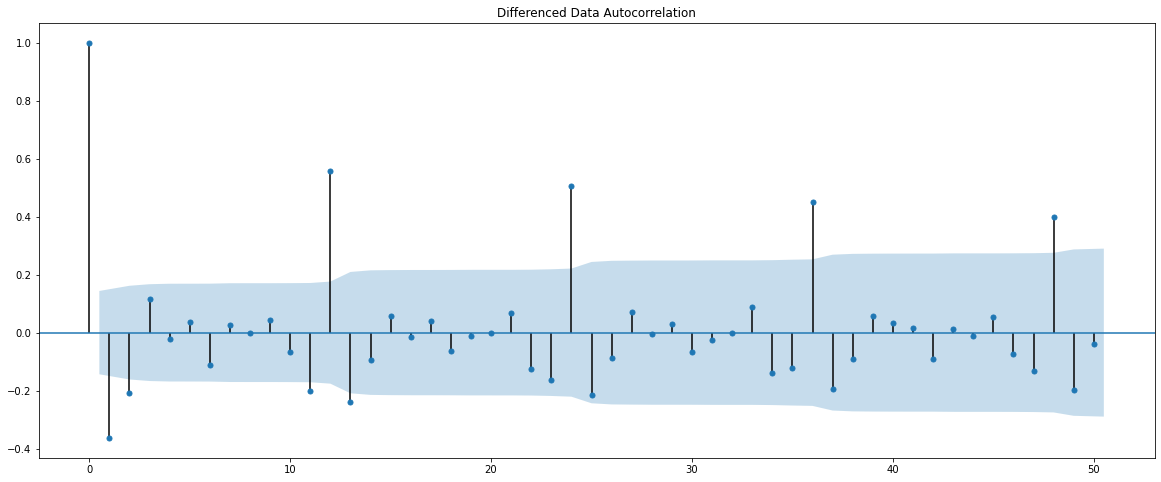

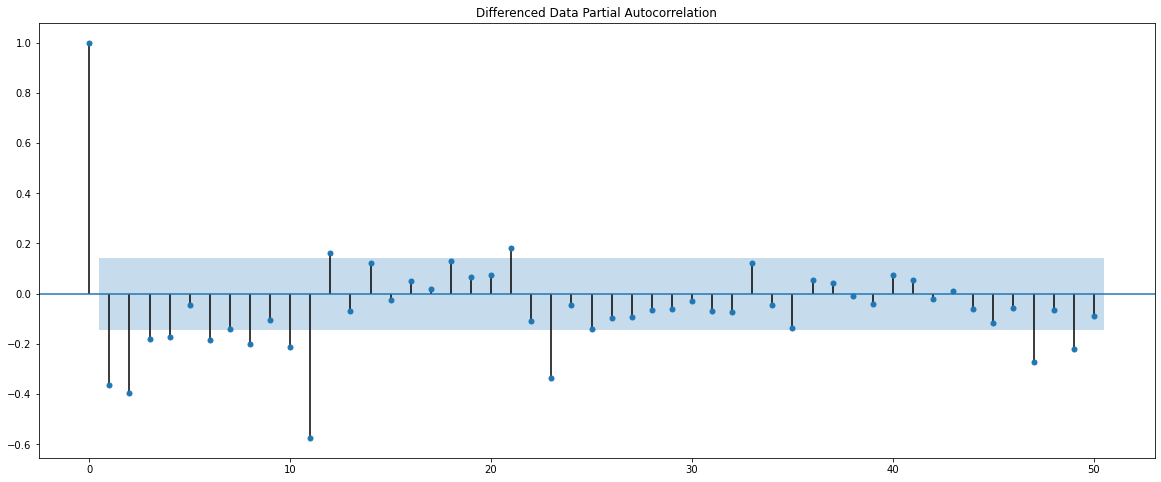

In [158]:
plot_acf(Rose_df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(Rose_df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [159]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(0,0,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                              ARMA Model Results                              
Dep. Variable:                   Rose   No. Observations:                  132
Model:                     ARMA(0, 0)   Log Likelihood                -660.450
Method:                           css   S.D. of innovations             36.034
Date:                Sun, 25 Jul 2021   AIC                           1324.900
Time:                        21:23:01   BIC                           1330.665
Sample:                    01-31-1980   HQIC                          1327.243
                         - 12-31-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.9394      3.136     33.459      0.000      98.792     111.087


We get a comparatively simpler model by looking at the ACF and the PACF plots.

#### Predict on the Test Set using this model and evaluate the model.

In [160]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [161]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

53.46056964611445


In [ ]:
resultsDf_13 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(1,1,1)/ACF-PACF'])

resultsDf = pd.concat([resultsDf, resultsDf_13])
resultsDf

We see that there is difference in the RMSE values for both the models, but remember that the second model is a much simpler model.

#### 2. Building a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12.

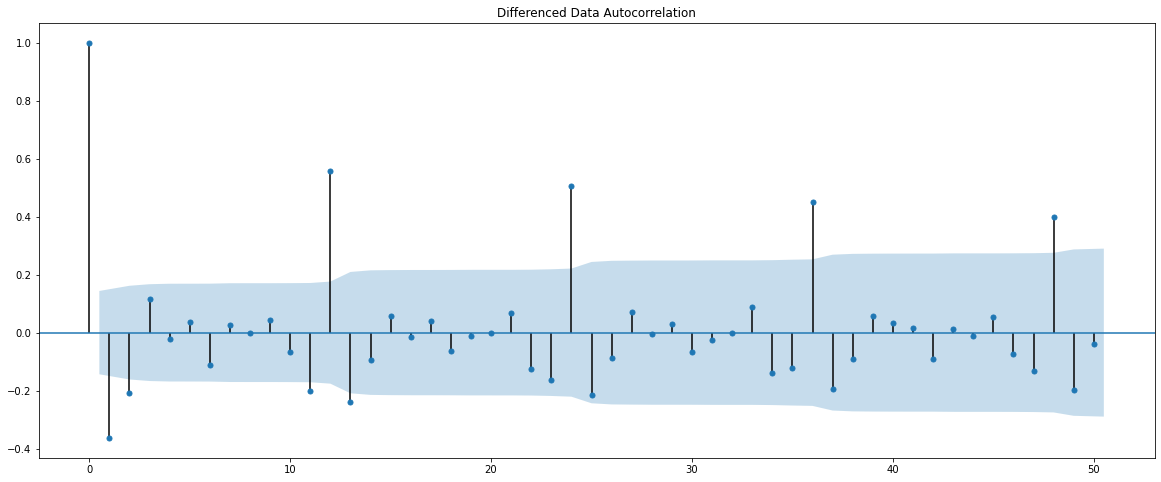

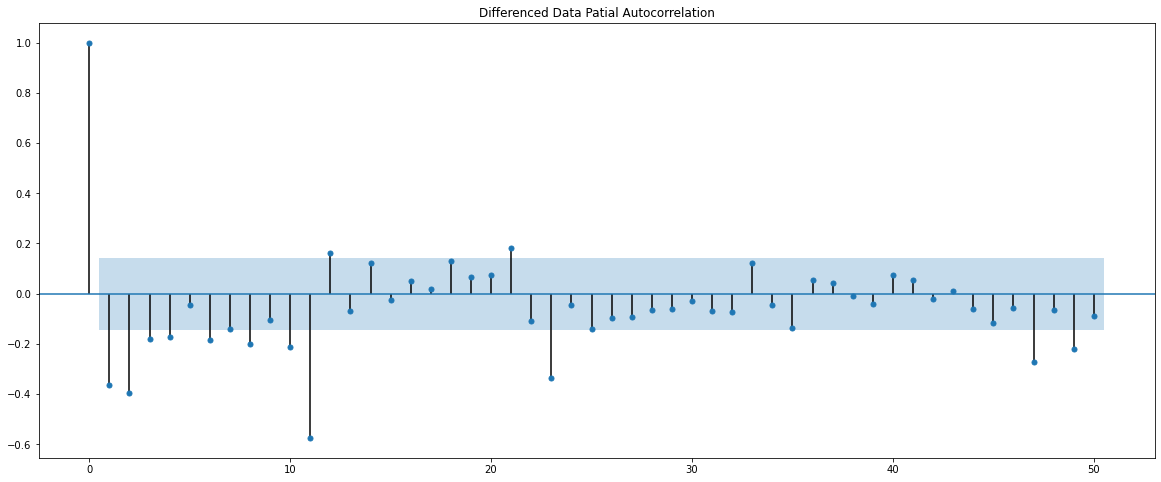

In [162]:
plot_acf(Rose_df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(Rose_df['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

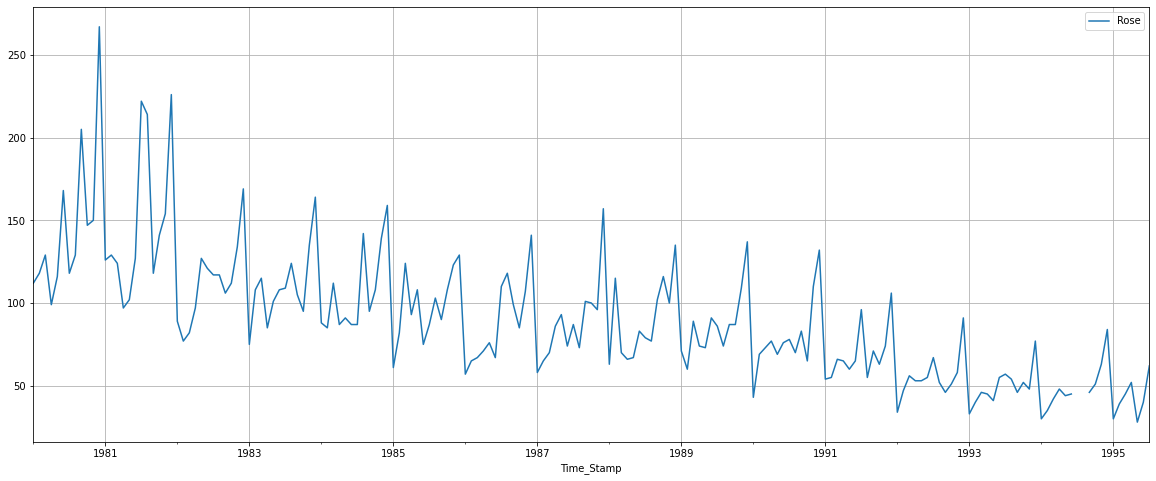

In [163]:
df.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

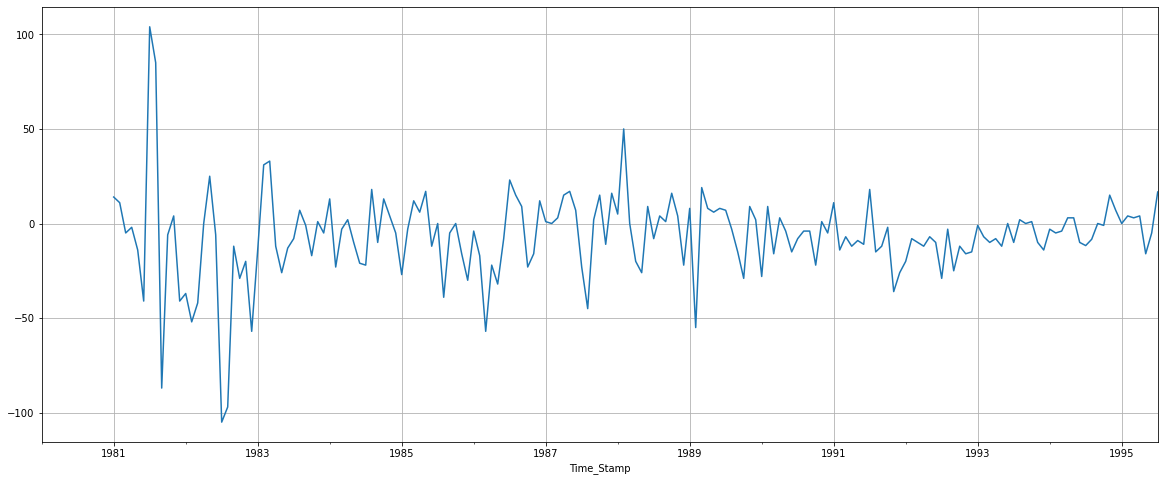

In [164]:
(Rose_df['Rose'].diff(12)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

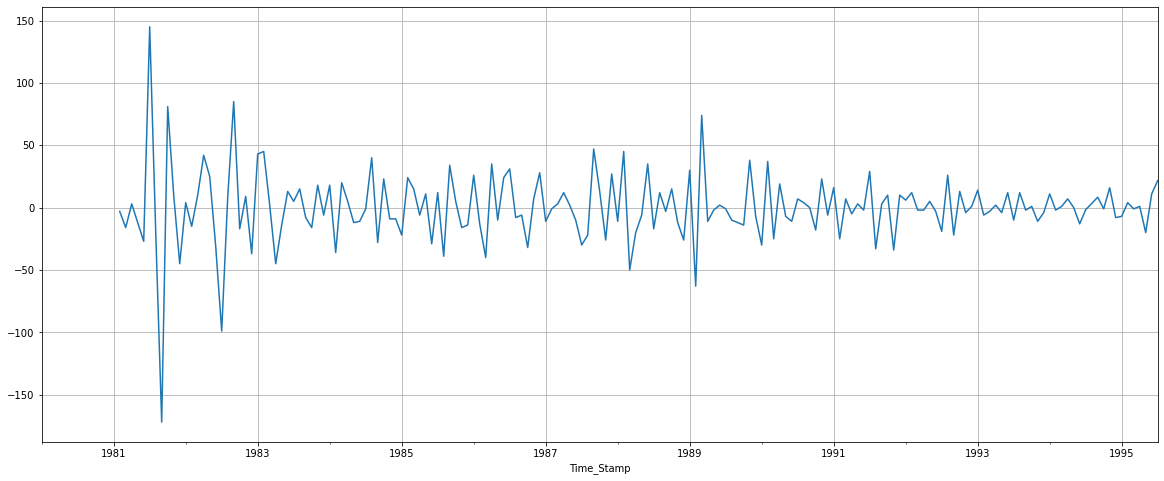

In [165]:
(Rose_df['Rose'].diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

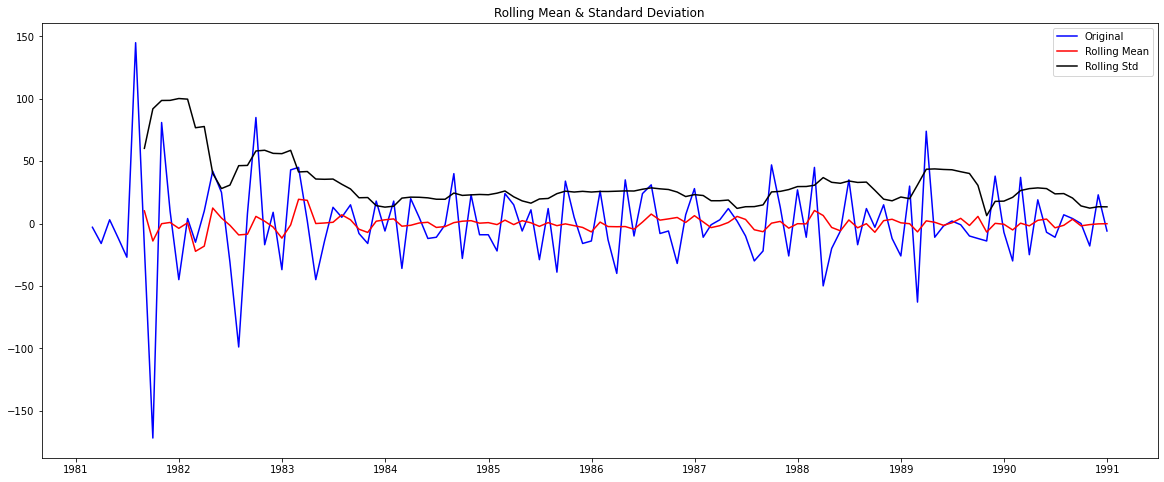

Results of Dickey-Fuller Test:
Test Statistic                 -3.69
p-value                         0.00
#Lags Used                     11.00
Number of Observations Used   107.00
Critical Value (1%)            -3.49
Critical Value (5%)            -2.89
Critical Value (10%)           -2.58
dtype: float64 



In [166]:
test_stationarity((train['Rose'].diff(12).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

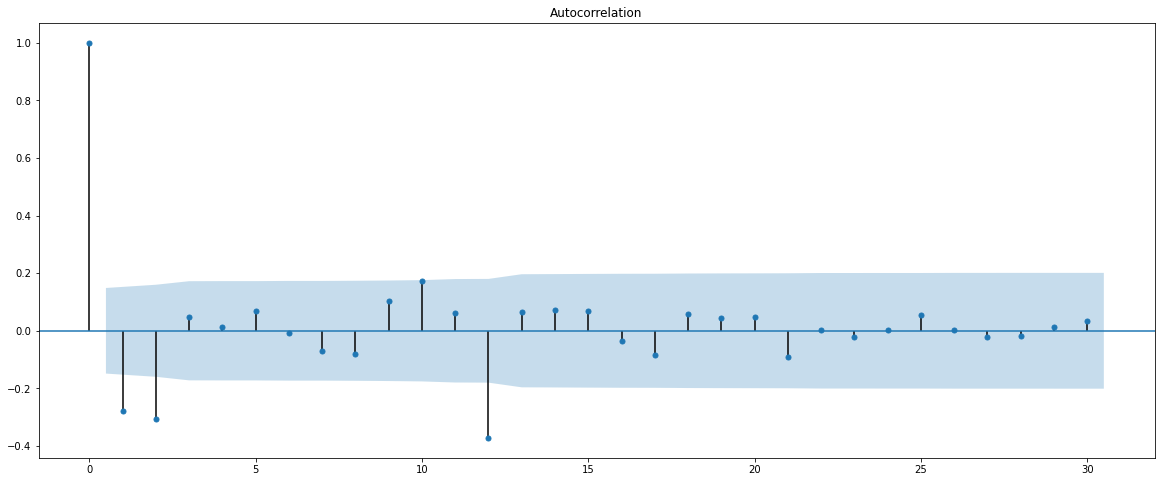

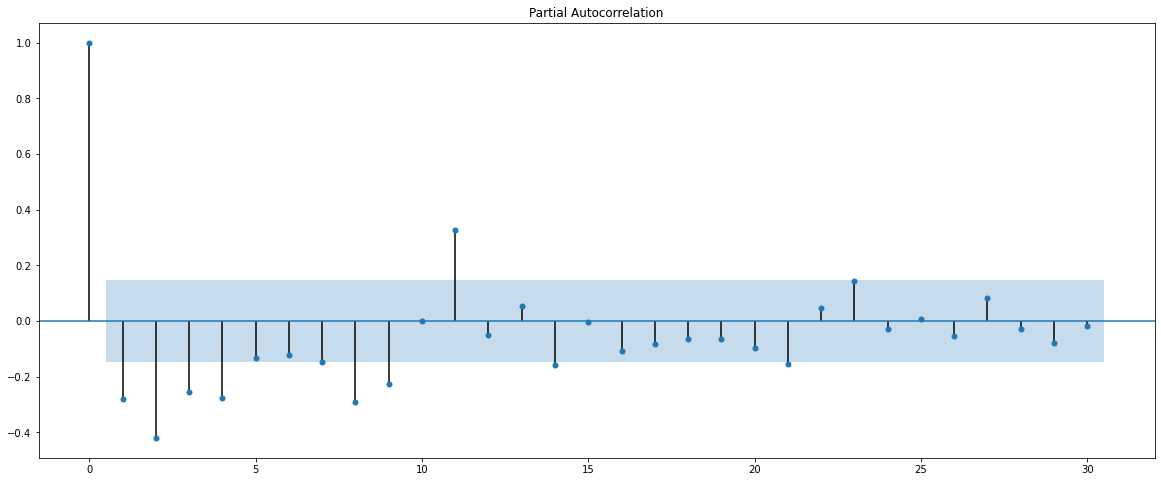

In [167]:
plot_acf((Rose_df['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((Rose_df['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12.
We will keep the p(1) and q(1) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0.


In [168]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 0, 0),
                                seasonal_order=(0, 2, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12= manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                SARIMAX Results                                 
Dep. Variable:                        y   No. Observations:                  132
Model:             SARIMAX(0, 2, 0, 12)   Log Likelihood                -557.449
Date:                  Sun, 25 Jul 2021   AIC                           1116.899
Time:                          21:27:53   BIC                           1119.572
Sample:                               0   HQIC                          1117.982
                                  - 132                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1961.6675    135.590     14.468      0.000    1695.916    2227.419
Ljung-Box (L1) (Q):                   6.38   Jarque-Bera (JB):               181.93
Prob(Q):                       

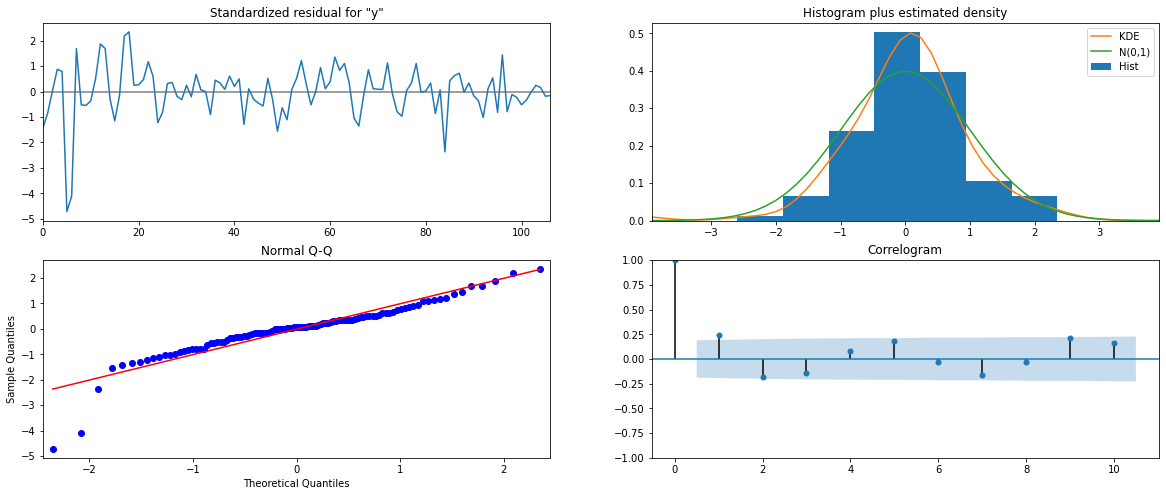

In [169]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [170]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [171]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,15.00,44.29,-71.81,101.81
1,78.00,44.29,-8.81,164.81
2,57.00,44.29,-29.81,143.81
3,80.00,44.29,-6.81,166.81
4,65.00,44.29,-21.81,151.81


In [172]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

41.231252244091706


In [173]:
resultsDf_14 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,0,0)(0,2,0,12)/ACF-PACF'])

resultsDf = pd.concat([resultsDf, resultsDf_14])
resultsDf

,Test RMSE
RegressionOnTime,51.43
NaiveModel,79.72
SimpleAverageModel,53.46
2pointTrailingMovingAverage,11.53
4pointTrailingMovingAverage,14.45
6pointTrailingMovingAverage,14.57
9pointTrailingMovingAverage,14.73
"Alpha=0.09874,SimpleExponentialSmoothing",36.80
"Alpha=0.07,SimpleExponentialSmoothing",36.44
"Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing",14.56


### Q 8 Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [174]:
resultsDf

,Test RMSE
RegressionOnTime,51.43
NaiveModel,79.72
SimpleAverageModel,53.46
2pointTrailingMovingAverage,11.53
4pointTrailingMovingAverage,14.45
6pointTrailingMovingAverage,14.57
9pointTrailingMovingAverage,14.73
"Alpha=0.09874,SimpleExponentialSmoothing",36.80
"Alpha=0.07,SimpleExponentialSmoothing",36.44
"Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing",14.56


In [175]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

,Test RMSE
2pointTrailingMovingAverage,11.53
"Alpha=0.088,Beta=4.108,Gamma=5.241,TripleExponentialSmoothing",14.23
4pointTrailingMovingAverage,14.45
"Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing",14.56
6pointTrailingMovingAverage,14.57
9pointTrailingMovingAverage,14.73
"ARIMA(0,1,2)",15.62
"ARIMA(1,1,1)",15.73
"SARIMA(0,1,2)(1,0,2,24)",19.93
"SARIMA(0,1,2)(2,0,2,12)",26.93


### Q 9 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

#### Building the most optimum model on the Full Data.

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [179]:
MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,112.00,nan,nan,nan,nan
1980-02-29,118.00,115.00,nan,nan,nan
1980-03-31,129.00,123.50,nan,nan,nan
1980-04-30,99.00,114.00,114.50,nan,nan
1980-05-31,116.00,107.50,115.50,nan,nan


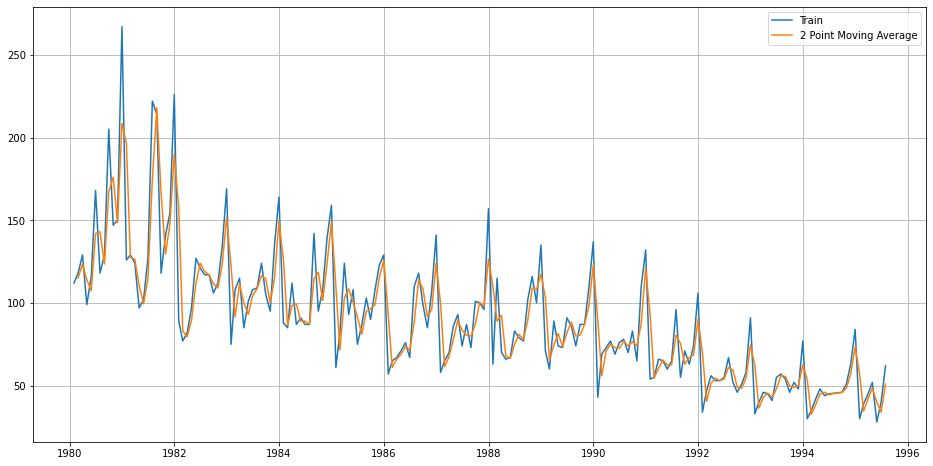

In [180]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')


plt.legend(loc = 'best')
plt.grid();

### Q 10 Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

- Refer to Sparkling Wine Business Report

### ThankYou!!